# Machine Learning Model (EMMA)

### This web application aims to tell you where you should roll your business out in Mexico, based on demographic information (income, location, education, and more)


# ETL process

In [1]:
pip install geopandas

  Using cached geopandas-0.9.0-py2.py3-none-any.whl (994 kB)
  Using cached Fiona-1.8.20.tar.gz (1.3 MB)
  Using cached Fiona-1.8.19.tar.gz (1.3 MB)
  Using cached Fiona-1.8.18.tar.gz (1.3 MB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)
  Using cached Fiona-1.8.16.tar.gz (1.3 MB)
  Using cached Fiona-1.8.15.tar.gz (1.3 MB)
  Using cached Fiona-1.8.14.tar.gz (1.3 MB)
  Using cached Fiona-1.8.13.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.13.tar.gz (1.2 MB)
  Using cached Fiona-1.8.12.tar.gz (1.2 MB)
  Using cached Fiona-1.8.11.tar.gz (1.2 MB)
  Using cached Fiona-1.8.10.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post2.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.tar.gz (1.2 MB)
  Using cached Fiona-1.8.8.tar.gz (1.7 MB)
  Using cached Fiona-1.8.7.tar.gz (1.7 MB)
  Using cached Fiona-1.8.6.tar.gz (1.7 MB)
  Using cached Fiona-1.8.5.tar.gz (1.7 MB)
  Using cached Fiona-1.8.4.tar.gz (1.1 MB)
  Using cached Fiona-1.8.3.tar.gz (1.1 MB)
  Usin

    ERROR: Command errored out with exit status 1:
     command: 'D:\Users\rodrigo.guarneros\Anaconda4\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'D:\\Users\\rodrigo.guarneros\\AppData\\Local\\Temp\\pip-install-zx3g75n4\\fiona_dca651e1d29b4965b9545f7eee98de07\\setup.py'"'"'; __file__='"'"'D:\\Users\\rodrigo.guarneros\\AppData\\Local\\Temp\\pip-install-zx3g75n4\\fiona_dca651e1d29b4965b9545f7eee98de07\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'D:\Users\rodrigo.guarneros\AppData\Local\Temp\pip-pip-egg-info-gc4l9w22'
         cwd: D:\Users\rodrigo.guarneros\AppData\Local\Temp\pip-install-zx3g75n4\fiona_dca651e1d29b4965b9545f7eee98de07\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment var

    ERROR: Command errored out with exit status 1:
     command: 'D:\Users\rodrigo.guarneros\Anaconda4\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'D:\\Users\\rodrigo.guarneros\\AppData\\Local\\Temp\\pip-install-zx3g75n4\\fiona_f80b6f6b1d6e42d58a35c6ed634f985c\\setup.py'"'"'; __file__='"'"'D:\\Users\\rodrigo.guarneros\\AppData\\Local\\Temp\\pip-install-zx3g75n4\\fiona_f80b6f6b1d6e42d58a35c6ed634f985c\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'D:\Users\rodrigo.guarneros\AppData\Local\Temp\pip-pip-egg-info-y0s29xoy'
         cwd: D:\Users\rodrigo.guarneros\AppData\Local\Temp\pip-install-zx3g75n4\fiona_f80b6f6b1d6e42d58a35c6ed634f985c\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment var

In [2]:
!pip install pymongo

  Using cached pymongo-3.12.0-cp38-cp38-win_amd64.whl (397 kB)


You should consider upgrading via the 'd:\users\rodrigo.guarneros\documents\2021\nanodegree\environment\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import dependencies
import pandas as pd
import re
import json
import pymongo
#import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import os

In [5]:
# Read data
censo = pd.read_csv("Censo_2020_final.csv", encoding='Latin1', low_memory=False)
deposits = pd.read_csv("deposits.csv", encoding='Latin1', low_memory=False)
infrastructure = pd.read_csv("financial_infrastructure.csv", encoding='Latin1', low_memory=False)
use = pd.read_csv("financial_use.csv", encoding='Latin1', low_memory=False)
irs = pd.read_csv("IRS.csv", encoding='Latin1', low_memory=False)


In [6]:
censo.columns

Index(['ï»¿ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD', 'POBTOT', 'POBFEM', 'POBMAS', 'POB_TOT_6more',
       'POB_TOT_6more_F', 'POB_TOT_6more_M', 'GRAPROES', 'GRAPROES_F',
       'GRAPROES_M', 'POCUPADA', 'POCUPADA_F', 'POCUPADA_M', 'TVIVHAB',
       'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ', 'VPH_REFRI', 'VPH_AUTOM',
       'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF', 'VPH_CEL',
       'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'TAMLOC',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50'],
      dtype='object')

In [7]:
censo = censo.loc[:, ~censo.columns.str.contains('^Unnamed')]
censo.columns

Index(['ï»¿ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD', 'POBTOT', 'POBFEM', 'POBMAS', 'POB_TOT_6more',
       'POB_TOT_6more_F', 'POB_TOT_6more_M', 'GRAPROES', 'GRAPROES_F',
       'GRAPROES_M', 'POCUPADA', 'POCUPADA_F', 'POCUPADA_M', 'TVIVHAB',
       'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ', 'VPH_REFRI', 'VPH_AUTOM',
       'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF', 'VPH_CEL',
       'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'TAMLOC'],
      dtype='object')

In [8]:
censo = censo.rename(columns={'ï»¿ENTIDAD':'Entidad'}, inplace=False)
censo.columns

Index(['Entidad', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD', 'POBTOT', 'POBFEM', 'POBMAS', 'POB_TOT_6more',
       'POB_TOT_6more_F', 'POB_TOT_6more_M', 'GRAPROES', 'GRAPROES_F',
       'GRAPROES_M', 'POCUPADA', 'POCUPADA_F', 'POCUPADA_M', 'TVIVHAB',
       'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ', 'VPH_REFRI', 'VPH_AUTOM',
       'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF', 'VPH_CEL',
       'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'TAMLOC'],
      dtype='object')

In [9]:
censo

,Entidad,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,TAMLOC
0,1,Aguascalientes,1,Aguascalientes,0,Total del Municipio,NaN,NaN,NaN,948990,...,221315,257061,136923,116647,251719,178619,130290,80951,56131,*
1,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,"102Â°17'45.768"" W","21Â°52'47.362"" N",1878,863893,...,204535,237274,130384,112002,232793,169675,123670,77719,53589,13
2,1,Aguascalientes,1,Aguascalientes,94,Granja Adelita,"102Â°22'24.710"" W","21Â°52'18.749"" N",1902,5,...,*,*,*,*,*,*,*,*,*,1
3,1,Aguascalientes,1,Aguascalientes,96,Agua Azul,"102Â°21'25.639"" W","21Â°53'01.522"" N",1861,41,...,11,11,5,2,11,4,5,2,1,1
4,1,Aguascalientes,1,Aguascalientes,102,Los Arbolitos [Rancho],"102Â°21'26.261"" W","21Â°46'48.650"" N",1861,8,...,*,*,*,*,*,*,*,*,*,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98402,32,Zacatecas,58,Santa MarÃ­a de la Paz,37,Mesa Grande,"103Â°24'52.925"" W","21Â°33'12.375"" N",1944,165,...,29,44,6,29,24,9,13,0,0,1
98403,32,Zacatecas,58,Santa MarÃ­a de la Paz,39,San Isidro,"103Â°20'14.164"" W","21Â°29'11.130"" N",2031,1,...,*,*,*,*,*,*,*,*,*,1
98404,32,Zacatecas,58,Santa MarÃ­a de la Paz,41,San Miguel TepetitlÃ¡n,"103Â°20'09.356"" W","21Â°30'15.168"" N",1977,97,...,20,26,4,1,21,12,21,1,1,1
98405,32,Zacatecas,58,Santa MarÃ­a de la Paz,42,San Rafael,"103Â°22'20.134"" W","21Â°31'39.341"" N",2042,3,...,*,*,*,*,*,*,*,*,*,1


In [10]:
censo['LONGITUD']= censo['LONGITUD'].replace('Â','', regex=True)
censo['LATITUD']= censo['LATITUD'].replace('Â','', regex=True)
censo

,Entidad,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,TAMLOC
0,1,Aguascalientes,1,Aguascalientes,0,Total del Municipio,NaN,NaN,NaN,948990,...,221315,257061,136923,116647,251719,178619,130290,80951,56131,*
1,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,"102°17'45.768"" W","21°52'47.362"" N",1878,863893,...,204535,237274,130384,112002,232793,169675,123670,77719,53589,13
2,1,Aguascalientes,1,Aguascalientes,94,Granja Adelita,"102°22'24.710"" W","21°52'18.749"" N",1902,5,...,*,*,*,*,*,*,*,*,*,1
3,1,Aguascalientes,1,Aguascalientes,96,Agua Azul,"102°21'25.639"" W","21°53'01.522"" N",1861,41,...,11,11,5,2,11,4,5,2,1,1
4,1,Aguascalientes,1,Aguascalientes,102,Los Arbolitos [Rancho],"102°21'26.261"" W","21°46'48.650"" N",1861,8,...,*,*,*,*,*,*,*,*,*,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98402,32,Zacatecas,58,Santa MarÃ­a de la Paz,37,Mesa Grande,"103°24'52.925"" W","21°33'12.375"" N",1944,165,...,29,44,6,29,24,9,13,0,0,1
98403,32,Zacatecas,58,Santa MarÃ­a de la Paz,39,San Isidro,"103°20'14.164"" W","21°29'11.130"" N",2031,1,...,*,*,*,*,*,*,*,*,*,1
98404,32,Zacatecas,58,Santa MarÃ­a de la Paz,41,San Miguel TepetitlÃ¡n,"103°20'09.356"" W","21°30'15.168"" N",1977,97,...,20,26,4,1,21,12,21,1,1,1
98405,32,Zacatecas,58,Santa MarÃ­a de la Paz,42,San Rafael,"103°22'20.134"" W","21°31'39.341"" N",2042,3,...,*,*,*,*,*,*,*,*,*,1


In [11]:
infrastructure

,Clave Municipio,Clave \nEstado,Región,Estado,Municipio,Tipo de población,Branch_BC,Branch_DB,Sucursales Socap,Sucursales Sofipo,Branch_Total,Corresponsales,ATM,PST,Building_PST,MB_contracts
0,1001,1,Occidente y Bajío,Aguascalientes,Aguascalientes,Semi-metrópoli,117,2,16,8,143,458,611,17570,11424,393411
1,1002,1,Occidente y Bajío,Aguascalientes,Asientos,Urbano,0,0,0,0,0,8,4,68,54,8717
2,1003,1,Occidente y Bajío,Aguascalientes,Calvillo,Urbano,5,0,2,0,7,19,17,152,136,11549
3,1004,1,Occidente y Bajío,Aguascalientes,Cosío,Semi-urbano,0,0,0,0,0,5,4,27,21,2044
4,1005,1,Occidente y Bajío,Aguascalientes,Jesús María,Urbano,3,0,1,0,4,48,23,828,654,23794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,32055,32,Occidente y Bajío,Zacatecas,Villanueva,Semi-urbano,3,0,0,0,3,8,3,39,32,4792
2462,32056,32,Occidente y Bajío,Zacatecas,Zacatecas,Urbano,27,1,6,3,37,112,163,3446,2337,93016
2463,32057,32,Occidente y Bajío,Zacatecas,Trancoso,Semi-urbano,0,0,0,0,0,2,2,16,8,2635
2464,32058,32,Occidente y Bajío,Zacatecas,Santa María de la Paz,Rural,0,0,0,0,0,0,0,2,2,77


# Transform
- Census

In [12]:
# First, we remove all the blank values from rows that sum up total, since they don't have any latitude or longitude we can use
censo = censo.dropna()
censo

,Entidad,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,TAMLOC
1,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,"102°17'45.768"" W","21°52'47.362"" N",1878,863893,...,204535,237274,130384,112002,232793,169675,123670,77719,53589,13
2,1,Aguascalientes,1,Aguascalientes,94,Granja Adelita,"102°22'24.710"" W","21°52'18.749"" N",1902,5,...,*,*,*,*,*,*,*,*,*,1
3,1,Aguascalientes,1,Aguascalientes,96,Agua Azul,"102°21'25.639"" W","21°53'01.522"" N",1861,41,...,11,11,5,2,11,4,5,2,1,1
4,1,Aguascalientes,1,Aguascalientes,102,Los Arbolitos [Rancho],"102°21'26.261"" W","21°46'48.650"" N",1861,8,...,*,*,*,*,*,*,*,*,*,1
5,1,Aguascalientes,1,Aguascalientes,104,Ardillas de Abajo (Las Ardillas),"102°11'30.914"" W","21°56'42.243"" N",1989,1,...,*,*,*,*,*,*,*,*,*,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98401,32,Zacatecas,58,Santa MarÃ­a de la Paz,35,Los Trigos (Mesa de los Trigos),"103°14'27.792"" W","21°29'51.355"" N",2499,89,...,13,18,2,0,19,1,5,0,0,1
98402,32,Zacatecas,58,Santa MarÃ­a de la Paz,37,Mesa Grande,"103°24'52.925"" W","21°33'12.375"" N",1944,165,...,29,44,6,29,24,9,13,0,0,1
98403,32,Zacatecas,58,Santa MarÃ­a de la Paz,39,San Isidro,"103°20'14.164"" W","21°29'11.130"" N",2031,1,...,*,*,*,*,*,*,*,*,*,1
98404,32,Zacatecas,58,Santa MarÃ­a de la Paz,41,San Miguel TepetitlÃ¡n,"103°20'09.356"" W","21°30'15.168"" N",1977,97,...,20,26,4,1,21,12,21,1,1,1


In [13]:
# Then, create a function to change the coordinates to the correct type
def dms2dd(s):
    # example: s = """0°51'56.29"S"""
    degrees, minutes, seconds, direction = re.split('[°\'"]+', s)
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction in ('S','W'):
        dd*= -1
    return dd


In [14]:
# We use the function to change both latitude and longitude columns
censo['LATITUD'] = censo['LATITUD'].apply(dms2dd)
censo['LONGITUD'] = censo['LONGITUD'].apply(dms2dd)*-1

<ipython-input-14-e29c7409f113>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  censo['LATITUD'] = censo['LATITUD'].apply(dms2dd)
<ipython-input-14-e29c7409f113>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  censo['LONGITUD'] = censo['LONGITUD'].apply(dms2dd)*-1


In [15]:
censo

,Entidad,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,TAMLOC
1,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,-102.296047,21.879823,1878,863893,...,204535,237274,130384,112002,232793,169675,123670,77719,53589,13
2,1,Aguascalientes,1,Aguascalientes,94,Granja Adelita,-102.373531,21.871875,1902,5,...,*,*,*,*,*,*,*,*,*,1
3,1,Aguascalientes,1,Aguascalientes,96,Agua Azul,-102.357122,21.883756,1861,41,...,11,11,5,2,11,4,5,2,1,1
4,1,Aguascalientes,1,Aguascalientes,102,Los Arbolitos [Rancho],-102.357295,21.780181,1861,8,...,*,*,*,*,*,*,*,*,*,1
5,1,Aguascalientes,1,Aguascalientes,104,Ardillas de Abajo (Las Ardillas),-102.191921,21.945068,1989,1,...,*,*,*,*,*,*,*,*,*,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98401,32,Zacatecas,58,Santa MarÃ­a de la Paz,35,Los Trigos (Mesa de los Trigos),-103.241053,21.497599,2499,89,...,13,18,2,0,19,1,5,0,0,1
98402,32,Zacatecas,58,Santa MarÃ­a de la Paz,37,Mesa Grande,-103.414701,21.553438,1944,165,...,29,44,6,29,24,9,13,0,0,1
98403,32,Zacatecas,58,Santa MarÃ­a de la Paz,39,San Isidro,-103.337268,21.486425,2031,1,...,*,*,*,*,*,*,*,*,*,1
98404,32,Zacatecas,58,Santa MarÃ­a de la Paz,41,San Miguel TepetitlÃ¡n,-103.335932,21.504213,1977,97,...,20,26,4,1,21,12,21,1,1,1


In [16]:
irs = pd.read_csv("IRS.csv", encoding='Latin1', low_memory=False)
irs


,Clave_entidad,Entidad_federativa,Clave_municipio,Municipio,IRS
0,1,Aguascalientes,1001,Aguascalientes,-1.32
1,1,Aguascalientes,1002,Asientos,-0.86
2,1,Aguascalientes,1003,Calvillo,-0.92
3,1,Aguascalientes,1004,Cosío,-1.00
4,1,Aguascalientes,1005,Jesús María,-1.17
...,...,...,...,...,...
2464,32,Zacatecas,32054,Villa Hidalgo,-0.69
2465,32,Zacatecas,32055,Villanueva,-0.88
2466,32,Zacatecas,32056,Zacatecas,-1.34
2467,32,Zacatecas,32057,Trancoso,-0.75


In [17]:
#irs['Clave_municipio2'] = irs['Clave_municipio'].str[-2:]
irs['Clave_municipio'] = irs.Clave_municipio.astype(str).str[2:].astype(int)

In [18]:
irs=irs.drop(['Clave_municipio2', 'Clave_municipio3', 'Clave_municipio4'], axis=1)

KeyError: "['Clave_municipio2' 'Clave_municipio3' 'Clave_municipio4'] not found in axis"

In [19]:
irs

,Clave_entidad,Entidad_federativa,Clave_municipio,Municipio,IRS
0,1,Aguascalientes,1,Aguascalientes,-1.32
1,1,Aguascalientes,2,Asientos,-0.86
2,1,Aguascalientes,3,Calvillo,-0.92
3,1,Aguascalientes,4,Cosío,-1.00
4,1,Aguascalientes,5,Jesús María,-1.17
...,...,...,...,...,...
2464,32,Zacatecas,54,Villa Hidalgo,-0.69
2465,32,Zacatecas,55,Villanueva,-0.88
2466,32,Zacatecas,56,Zacatecas,-1.34
2467,32,Zacatecas,57,Trancoso,-0.75


In [20]:
use

,Clave Municipio,Clave \nEstado,Región,Estado,Municipio,Accounts_1,Accounts_2,Accounts_3,Accounts_4,Saving_account,Debit_card,Credit_card,mortgage,Crupal_credit,Personal_credit,payroll_credit,Automotive_credit,ABCD_credit,transactions_pst,transactions_ATM
0,1001,1,Occidente y Bajío,Aguascalientes,Aguascalientes,0,273512,6273,780665,1,1153278,271846,21739,5365,84143,48014,10474,28113,2254262,1874377
1,1002,1,Occidente y Bajío,Aguascalientes,Asientos,0,1454,0,0,0,1247,1122,161,639,3028,1280,102,1675,11265,15499
2,1003,1,Occidente y Bajío,Aguascalientes,Calvillo,0,3536,22,18846,0,30233,9057,103,98,5184,919,121,1349,10655,62460
3,1004,1,Occidente y Bajío,Aguascalientes,Cosío,0,382,0,0,0,515,436,140,471,1746,613,61,951,4252,18031
4,1005,1,Occidente y Bajío,Aguascalientes,Jesús María,0,6430,0,12601,0,21713,16352,4377,671,8678,4476,1364,5499,109775,73304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,32055,32,Occidente y Bajío,Zacatecas,Villanueva,0,1251,43,8547,0,10494,3446,25,199,2211,534,92,166,2664,14750
2462,32056,32,Occidente y Bajío,Zacatecas,Zacatecas,0,38339,3377,219334,0,395525,63976,2409,2021,11152,9482,2725,1988,410839,380406
2463,32057,32,Occidente y Bajío,Zacatecas,Trancoso,0,992,0,0,0,309,216,27,843,631,573,43,59,4495,7135
2464,32058,32,Occidente y Bajío,Zacatecas,Santa María de la Paz,0,18,0,0,0,10,12,0,0,25,34,4,20,237,0


In [21]:
use['Clave Municipio'] = use['Clave Municipio'].astype(str).str[2:].astype(int)

In [22]:
deposits['Clave Municipio'] = deposits['Clave Municipio'].astype(str).str[2:].astype(int)

In [23]:
infrastructure['Clave Municipio'] = infrastructure['Clave Municipio'].astype(str).str[2:].astype(int)

In [24]:
censo.columns

Index(['Entidad', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD', 'POBTOT', 'POBFEM', 'POBMAS', 'POB_TOT_6more',
       'POB_TOT_6more_F', 'POB_TOT_6more_M', 'GRAPROES', 'GRAPROES_F',
       'GRAPROES_M', 'POCUPADA', 'POCUPADA_F', 'POCUPADA_M', 'TVIVHAB',
       'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ', 'VPH_REFRI', 'VPH_AUTOM',
       'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF', 'VPH_CEL',
       'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'TAMLOC'],
      dtype='object')

In [25]:
use.columns

Index(['Clave Municipio', 'Clave \nEstado', 'Región', 'Estado', 'Municipio',
       'Accounts_1', 'Accounts_2', 'Accounts_3', 'Accounts_4',
       'Saving_account', 'Debit_card', 'Credit_card', 'mortgage',
       'Crupal_credit', 'Personal_credit', 'payroll_credit',
       'Automotive_credit', 'ABCD_credit', 'transactions_pst',
       'transactions_ATM'],
      dtype='object')

In [26]:
infrastructure.columns

Index(['Clave Municipio', 'Clave \nEstado', 'Región', 'Estado', 'Municipio',
       'Tipo de población', 'Branch_BC', 'Branch_DB', 'Sucursales Socap',
       'Sucursales Sofipo', 'Branch_Total', 'Corresponsales', 'ATM', 'PST',
       'Building_PST', 'MB_contracts'],
      dtype='object')

In [27]:
deposits.columns

Index(['Clave Municipio', 'Clave \nEstado', 'Región', 'Estado', 'Municipio',
       'Tipo de población', 'saving_deposits', 'sight_deposits',
       'term_deposits', 'debit_deposits'],
      dtype='object')

In [28]:
deposits.describe

<bound method NDFrame.describe of       Clave Municipio  Clave \nEstado             Región           Estado  \
0                   1               1  Occidente y Bajío   Aguascalientes   
1                   2               1  Occidente y Bajío   Aguascalientes   
2                   3               1  Occidente y Bajío   Aguascalientes   
3                   4               1  Occidente y Bajío   Aguascalientes   
4                   5               1  Occidente y Bajío   Aguascalientes   
...               ...             ...                ...              ...   
2461               55              32  Occidente y Bajío        Zacatecas   
2462               56              32  Occidente y Bajío        Zacatecas   
2463               57              32  Occidente y Bajío        Zacatecas   
2464               58              32  Occidente y Bajío        Zacatecas   
2465              999              99    Sin identificar  Sin identificar   

                  Municipio Tipo de pobla

In [29]:
infrastructure.describe

<bound method NDFrame.describe of       Clave Municipio  Clave \nEstado             Región           Estado  \
0                   1               1  Occidente y Bajío   Aguascalientes   
1                   2               1  Occidente y Bajío   Aguascalientes   
2                   3               1  Occidente y Bajío   Aguascalientes   
3                   4               1  Occidente y Bajío   Aguascalientes   
4                   5               1  Occidente y Bajío   Aguascalientes   
...               ...             ...                ...              ...   
2461               55              32  Occidente y Bajío        Zacatecas   
2462               56              32  Occidente y Bajío        Zacatecas   
2463               57              32  Occidente y Bajío        Zacatecas   
2464               58              32  Occidente y Bajío        Zacatecas   
2465              999              99    Sin identificar  Sin identificar   

                  Municipio Tipo de pobla

In [30]:
censo.columns

Index(['Entidad', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD', 'POBTOT', 'POBFEM', 'POBMAS', 'POB_TOT_6more',
       'POB_TOT_6more_F', 'POB_TOT_6more_M', 'GRAPROES', 'GRAPROES_F',
       'GRAPROES_M', 'POCUPADA', 'POCUPADA_F', 'POCUPADA_M', 'TVIVHAB',
       'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ', 'VPH_REFRI', 'VPH_AUTOM',
       'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF', 'VPH_CEL',
       'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'TAMLOC'],
      dtype='object')

In [31]:
censo = censo.drop(['LOC', 'NOM_LOC', 'LONGITUD', 'LATITUD', 'ALTITUD'], axis=1)

In [32]:
Columns = ['POBTOT', 'POBFEM', 'POBMAS', 'POB_TOT_6more',
       'POB_TOT_6more_F', 'POB_TOT_6more_M', 'GRAPROES', 'GRAPROES_F',
       'GRAPROES_M', 'POCUPADA', 'POCUPADA_F', 'POCUPADA_M', 'TVIVHAB',
       'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ', 'VPH_REFRI', 'VPH_AUTOM',
       'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF', 'VPH_CEL',
       'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'TAMLOC']

In [33]:
censo[Columns] = censo[Columns].apply(pd.to_numeric, errors = 'coerce')
censo

,Entidad,NOM_ENT,MUN,NOM_MUN,POBTOT,POBFEM,POBMAS,POB_TOT_6more,POB_TOT_6more_F,POB_TOT_6more_M,...,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,TAMLOC
1,1,Aguascalientes,1,Aguascalientes,863893,444725.0,419168.0,722445.0,482914.0,239531.0,...,204535.0,237274.0,130384.0,112002.0,232793.0,169675.0,123670.0,77719.0,53589.0,13.0
2,1,Aguascalientes,1,Aguascalientes,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,1,Aguascalientes,1,Aguascalientes,41,17.0,24.0,31.0,19.0,12.0,...,11.0,11.0,5.0,2.0,11.0,4.0,5.0,2.0,1.0,1.0
4,1,Aguascalientes,1,Aguascalientes,8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,1,Aguascalientes,1,Aguascalientes,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98401,32,Zacatecas,58,Santa MarÃ­a de la Paz,89,43.0,46.0,70.0,42.0,28.0,...,13.0,18.0,2.0,0.0,19.0,1.0,5.0,0.0,0.0,1.0
98402,32,Zacatecas,58,Santa MarÃ­a de la Paz,165,88.0,77.0,156.0,101.0,55.0,...,29.0,44.0,6.0,29.0,24.0,9.0,13.0,0.0,0.0,1.0
98403,32,Zacatecas,58,Santa MarÃ­a de la Paz,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
98404,32,Zacatecas,58,Santa MarÃ­a de la Paz,97,50.0,47.0,87.0,53.0,34.0,...,20.0,26.0,4.0,1.0,21.0,12.0,21.0,1.0,1.0,1.0


In [34]:
censo_df = censo.groupby(['Entidad',"MUN", 'NOM_ENT', 'NOM_MUN']).sum().reset_index()
censo_df

,Entidad,MUN,NOM_ENT,NOM_MUN,POBTOT,POBFEM,POBMAS,POB_TOT_6more,POB_TOT_6more_F,POB_TOT_6more_M,...,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,TAMLOC
0,1,1,Aguascalientes,Aguascalientes,919739,472763.0,446719.0,771121.0,514631.0,256508.0,...,215368.0,250028.0,133644.0,114196.0,244819.0,174765.0,127205.0,78731.0,54547.0,274.0
1,16,15,MichoacÃ¡n de Ocampo,CoalcomÃ¡n de VÃ¡zquez Pallares,3711,1316.0,1459.0,2387.0,1474.0,913.0,...,431.0,327.0,32.0,10.0,479.0,286.0,241.0,16.0,12.0,256.0
2,16,16,MichoacÃ¡n de Ocampo,Coeneo,41943,22077.0,19840.0,35843.0,23432.0,12411.0,...,7502.0,10861.0,1854.0,1401.0,9788.0,2448.0,6584.0,358.0,352.0,81.0
3,16,17,MichoacÃ¡n de Ocampo,Contepec,70159,36252.0,33888.0,61144.0,39840.0,21304.0,...,11962.0,16648.0,2012.0,1600.0,15188.0,2594.0,3740.0,340.0,408.0,147.0
4,16,18,MichoacÃ¡n de Ocampo,CopÃ¡ndaro,18968,9780.0,9182.0,16538.0,10668.0,5870.0,...,3340.0,4588.0,648.0,438.0,4146.0,1110.0,1664.0,120.0,122.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,32,54,Zacatecas,Villa Hidalgo,19446,9900.0,9458.0,16786.0,10817.0,5969.0,...,2901.0,4652.0,662.0,909.0,3913.0,1148.0,1087.0,109.0,106.0,84.0
1679,32,55,Zacatecas,Villanueva,31558,15865.0,15415.0,26875.0,17158.0,9717.0,...,5941.0,8382.0,2201.0,3163.0,7367.0,4402.0,5161.0,642.0,567.0,153.0
1680,32,56,Zacatecas,Zacatecas,149607,77547.0,71875.0,124256.0,83309.0,40947.0,...,33117.0,40791.0,24097.0,20493.0,39717.0,31982.0,28619.0,11941.0,7639.0,105.0
1681,32,57,Zacatecas,Trancoso,20455,10387.0,10003.0,17623.0,11460.0,6163.0,...,3432.0,4390.0,864.0,948.0,3819.0,1089.0,1848.0,202.0,184.0,37.0


In [35]:
censo_df['NOM_ENT']= censo_df['NOM_ENT'].replace('Â¡','á', regex=True)
censo_df['NOM_ENT']= censo_df['NOM_ENT'].replace('Ã³','ó', regex=True)
censo_df['NOM_ENT']= censo_df['NOM_ENT'].replace('Ã©','é', regex=True)
censo_df['NOM_ENT']= censo_df['NOM_ENT'].replace('Ã\xad','í', regex=True)
censo_df['NOM_ENT']= censo_df['NOM_ENT'].replace('Ã¡','á', regex=True)
censo_df

,Entidad,MUN,NOM_ENT,NOM_MUN,POBTOT,POBFEM,POBMAS,POB_TOT_6more,POB_TOT_6more_F,POB_TOT_6more_M,...,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,TAMLOC
0,1,1,Aguascalientes,Aguascalientes,919739,472763.0,446719.0,771121.0,514631.0,256508.0,...,215368.0,250028.0,133644.0,114196.0,244819.0,174765.0,127205.0,78731.0,54547.0,274.0
1,16,15,Michoacán de Ocampo,CoalcomÃ¡n de VÃ¡zquez Pallares,3711,1316.0,1459.0,2387.0,1474.0,913.0,...,431.0,327.0,32.0,10.0,479.0,286.0,241.0,16.0,12.0,256.0
2,16,16,Michoacán de Ocampo,Coeneo,41943,22077.0,19840.0,35843.0,23432.0,12411.0,...,7502.0,10861.0,1854.0,1401.0,9788.0,2448.0,6584.0,358.0,352.0,81.0
3,16,17,Michoacán de Ocampo,Contepec,70159,36252.0,33888.0,61144.0,39840.0,21304.0,...,11962.0,16648.0,2012.0,1600.0,15188.0,2594.0,3740.0,340.0,408.0,147.0
4,16,18,Michoacán de Ocampo,CopÃ¡ndaro,18968,9780.0,9182.0,16538.0,10668.0,5870.0,...,3340.0,4588.0,648.0,438.0,4146.0,1110.0,1664.0,120.0,122.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,32,54,Zacatecas,Villa Hidalgo,19446,9900.0,9458.0,16786.0,10817.0,5969.0,...,2901.0,4652.0,662.0,909.0,3913.0,1148.0,1087.0,109.0,106.0,84.0
1679,32,55,Zacatecas,Villanueva,31558,15865.0,15415.0,26875.0,17158.0,9717.0,...,5941.0,8382.0,2201.0,3163.0,7367.0,4402.0,5161.0,642.0,567.0,153.0
1680,32,56,Zacatecas,Zacatecas,149607,77547.0,71875.0,124256.0,83309.0,40947.0,...,33117.0,40791.0,24097.0,20493.0,39717.0,31982.0,28619.0,11941.0,7639.0,105.0
1681,32,57,Zacatecas,Trancoso,20455,10387.0,10003.0,17623.0,11460.0,6163.0,...,3432.0,4390.0,864.0,948.0,3819.0,1089.0,1848.0,202.0,184.0,37.0


In [36]:
censo_df['NOM_ENT'].unique()

array(['Aguascalientes', 'Michoacán de Ocampo', 'Morelos', 'Nayarit',
       'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo',
       'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
       'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán',
       'Zacatecas'], dtype=object)

In [37]:
censo_df['NOM_MUN']= censo_df['NOM_MUN'].replace('Â¡','á', regex=True)
censo_df['NOM_MUN']= censo_df['NOM_MUN'].replace('Ã³','ó', regex=True)
censo_df['NOM_MUN']= censo_df['NOM_MUN'].replace('Ã©','é', regex=True)
censo_df['NOM_MUN']= censo_df['NOM_MUN'].replace('Ã\xad','í', regex=True)
censo_df['NOM_MUN']= censo_df['NOM_MUN'].replace('Ã¡','á', regex=True)
censo_df

,Entidad,MUN,NOM_ENT,NOM_MUN,POBTOT,POBFEM,POBMAS,POB_TOT_6more,POB_TOT_6more_F,POB_TOT_6more_M,...,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,TAMLOC
0,1,1,Aguascalientes,Aguascalientes,919739,472763.0,446719.0,771121.0,514631.0,256508.0,...,215368.0,250028.0,133644.0,114196.0,244819.0,174765.0,127205.0,78731.0,54547.0,274.0
1,16,15,Michoacán de Ocampo,Coalcomán de Vázquez Pallares,3711,1316.0,1459.0,2387.0,1474.0,913.0,...,431.0,327.0,32.0,10.0,479.0,286.0,241.0,16.0,12.0,256.0
2,16,16,Michoacán de Ocampo,Coeneo,41943,22077.0,19840.0,35843.0,23432.0,12411.0,...,7502.0,10861.0,1854.0,1401.0,9788.0,2448.0,6584.0,358.0,352.0,81.0
3,16,17,Michoacán de Ocampo,Contepec,70159,36252.0,33888.0,61144.0,39840.0,21304.0,...,11962.0,16648.0,2012.0,1600.0,15188.0,2594.0,3740.0,340.0,408.0,147.0
4,16,18,Michoacán de Ocampo,Copándaro,18968,9780.0,9182.0,16538.0,10668.0,5870.0,...,3340.0,4588.0,648.0,438.0,4146.0,1110.0,1664.0,120.0,122.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,32,54,Zacatecas,Villa Hidalgo,19446,9900.0,9458.0,16786.0,10817.0,5969.0,...,2901.0,4652.0,662.0,909.0,3913.0,1148.0,1087.0,109.0,106.0,84.0
1679,32,55,Zacatecas,Villanueva,31558,15865.0,15415.0,26875.0,17158.0,9717.0,...,5941.0,8382.0,2201.0,3163.0,7367.0,4402.0,5161.0,642.0,567.0,153.0
1680,32,56,Zacatecas,Zacatecas,149607,77547.0,71875.0,124256.0,83309.0,40947.0,...,33117.0,40791.0,24097.0,20493.0,39717.0,31982.0,28619.0,11941.0,7639.0,105.0
1681,32,57,Zacatecas,Trancoso,20455,10387.0,10003.0,17623.0,11460.0,6163.0,...,3432.0,4390.0,864.0,948.0,3819.0,1089.0,1848.0,202.0,184.0,37.0


In [38]:
censo_df['NOM_MUN'].unique()


array(['Aguascalientes', 'Coalcomán de Vázquez Pallares', 'Coeneo', ...,
       'Zacatecas', 'Trancoso', 'Santa María de la Paz'], dtype=object)

In [39]:
deposits['Municipio'].unique()

array(['Aguascalientes', 'Asientos', 'Calvillo', ..., 'Trancoso',
       'Santa María de la Paz', 'Sin identificar'], dtype=object)

In [40]:
censo_df.columns

Index(['Entidad', 'MUN', 'NOM_ENT', 'NOM_MUN', 'POBTOT', 'POBFEM', 'POBMAS',
       'POB_TOT_6more', 'POB_TOT_6more_F', 'POB_TOT_6more_M', 'GRAPROES',
       'GRAPROES_F', 'GRAPROES_M', 'POCUPADA', 'POCUPADA_F', 'POCUPADA_M',
       'TVIVHAB', 'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ', 'VPH_REFRI',
       'VPH_AUTOM', 'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF',
       'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'TAMLOC'],
      dtype='object')

In [41]:
infrastructure.columns

Index(['Clave Municipio', 'Clave \nEstado', 'Región', 'Estado', 'Municipio',
       'Tipo de población', 'Branch_BC', 'Branch_DB', 'Sucursales Socap',
       'Sucursales Sofipo', 'Branch_Total', 'Corresponsales', 'ATM', 'PST',
       'Building_PST', 'MB_contracts'],
      dtype='object')

In [42]:
merge = censo_df.merge(infrastructure,how='left', left_on=['Entidad','MUN'],right_on=['Clave \nEstado','Clave Municipio'])


In [43]:
merge

,Entidad,MUN,NOM_ENT,NOM_MUN,POBTOT,POBFEM,POBMAS,POB_TOT_6more,POB_TOT_6more_F,POB_TOT_6more_M,...,Branch_BC,Branch_DB,Sucursales Socap,Sucursales Sofipo,Branch_Total,Corresponsales,ATM,PST,Building_PST,MB_contracts
0,1,1,Aguascalientes,Aguascalientes,919739,472763.0,446719.0,771121.0,514631.0,256508.0,...,117.0,2.0,16.0,8.0,143.0,458.0,611.0,17570.0,11424.0,393411.0
1,16,15,Michoacán de Ocampo,Coalcomán de Vázquez Pallares,3711,1316.0,1459.0,2387.0,1474.0,913.0,...,2.0,0.0,0.0,0.0,2.0,3.0,6.0,49.0,43.0,7365.0
2,16,16,Michoacán de Ocampo,Coeneo,41943,22077.0,19840.0,35843.0,23432.0,12411.0,...,1.0,1.0,1.0,0.0,3.0,2.0,1.0,39.0,35.0,2680.0
3,16,17,Michoacán de Ocampo,Contepec,70159,36252.0,33888.0,61144.0,39840.0,21304.0,...,1.0,0.0,2.0,0.0,3.0,3.0,3.0,82.0,51.0,3713.0
4,16,18,Michoacán de Ocampo,Copándaro,18968,9780.0,9182.0,16538.0,10668.0,5870.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0,9.0,940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,32,54,Zacatecas,Villa Hidalgo,19446,9900.0,9458.0,16786.0,10817.0,5969.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0,11.0,1303.0
1679,32,55,Zacatecas,Villanueva,31558,15865.0,15415.0,26875.0,17158.0,9717.0,...,3.0,0.0,0.0,0.0,3.0,8.0,3.0,39.0,32.0,4792.0
1680,32,56,Zacatecas,Zacatecas,149607,77547.0,71875.0,124256.0,83309.0,40947.0,...,27.0,1.0,6.0,3.0,37.0,112.0,163.0,3446.0,2337.0,93016.0
1681,32,57,Zacatecas,Trancoso,20455,10387.0,10003.0,17623.0,11460.0,6163.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,16.0,8.0,2635.0


In [44]:
merge.columns

Index(['Entidad', 'MUN', 'NOM_ENT', 'NOM_MUN', 'POBTOT', 'POBFEM', 'POBMAS',
       'POB_TOT_6more', 'POB_TOT_6more_F', 'POB_TOT_6more_M', 'GRAPROES',
       'GRAPROES_F', 'GRAPROES_M', 'POCUPADA', 'POCUPADA_F', 'POCUPADA_M',
       'TVIVHAB', 'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ', 'VPH_REFRI',
       'VPH_AUTOM', 'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF',
       'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'TAMLOC',
       'Clave Municipio', 'Clave \nEstado', 'Región', 'Estado', 'Municipio',
       'Tipo de población', 'Branch_BC', 'Branch_DB', 'Sucursales Socap',
       'Sucursales Sofipo', 'Branch_Total', 'Corresponsales', 'ATM', 'PST',
       'Building_PST', 'MB_contracts'],
      dtype='object')

In [45]:
merge2 = merge.merge(deposits,how='left', left_on=['Entidad','MUN'],right_on=['Clave \nEstado','Clave Municipio'])

In [46]:
merge2.columns

Index(['Entidad', 'MUN', 'NOM_ENT', 'NOM_MUN', 'POBTOT', 'POBFEM', 'POBMAS',
       'POB_TOT_6more', 'POB_TOT_6more_F', 'POB_TOT_6more_M', 'GRAPROES',
       'GRAPROES_F', 'GRAPROES_M', 'POCUPADA', 'POCUPADA_F', 'POCUPADA_M',
       'TVIVHAB', 'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ', 'VPH_REFRI',
       'VPH_AUTOM', 'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF',
       'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'TAMLOC',
       'Clave Municipio_x', 'Clave \nEstado_x', 'Región_x', 'Estado_x',
       'Municipio_x', 'Tipo de población_x', 'Branch_BC', 'Branch_DB',
       'Sucursales Socap', 'Sucursales Sofipo', 'Branch_Total',
       'Corresponsales', 'ATM', 'PST', 'Building_PST', 'MB_contracts',
       'Clave Municipio_y', 'Clave \nEstado_y', 'Región_y', 'Estado_y',
       'Municipio_y', 'Tipo de población_y', 'saving_deposits',
       'sight_deposits', 'term_deposits', 'debit_deposits'],
      dtype='object')

In [47]:
merge3 = merge2.merge(use,how='left', left_on=['Entidad','MUN'],right_on=['Clave \nEstado','Clave Municipio'])
merge3

,Entidad,MUN,NOM_ENT,NOM_MUN,POBTOT,POBFEM,POBMAS,POB_TOT_6more,POB_TOT_6more_F,POB_TOT_6more_M,...,Debit_card,Credit_card,mortgage,Crupal_credit,Personal_credit,payroll_credit,Automotive_credit,ABCD_credit,transactions_pst,transactions_ATM
0,1,1,Aguascalientes,Aguascalientes,919739,472763.0,446719.0,771121.0,514631.0,256508.0,...,1153278.0,271846.0,21739.0,5365.0,84143.0,48014.0,10474.0,28113.0,2254262.0,1874377.0
1,16,15,Michoacán de Ocampo,Coalcomán de Vázquez Pallares,3711,1316.0,1459.0,2387.0,1474.0,913.0,...,11037.0,2116.0,10.0,156.0,2469.0,389.0,27.0,111.0,5353.0,18007.0
2,16,16,Michoacán de Ocampo,Coeneo,41943,22077.0,19840.0,35843.0,23432.0,12411.0,...,11626.0,621.0,4.0,173.0,1600.0,176.0,15.0,319.0,1323.0,954.0
3,16,17,Michoacán de Ocampo,Contepec,70159,36252.0,33888.0,61144.0,39840.0,21304.0,...,2619.0,476.0,44.0,460.0,3298.0,331.0,27.0,1095.0,7874.0,2090.0
4,16,18,Michoacán de Ocampo,Copándaro,18968,9780.0,9182.0,16538.0,10668.0,5870.0,...,71.0,106.0,1.0,123.0,380.0,79.0,3.0,77.0,6343.0,1271.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,32,54,Zacatecas,Villa Hidalgo,19446,9900.0,9458.0,16786.0,10817.0,5969.0,...,65.0,137.0,8.0,142.0,266.0,261.0,28.0,246.0,1565.0,5929.0
1679,32,55,Zacatecas,Villanueva,31558,15865.0,15415.0,26875.0,17158.0,9717.0,...,10494.0,3446.0,25.0,199.0,2211.0,534.0,92.0,166.0,2664.0,14750.0
1680,32,56,Zacatecas,Zacatecas,149607,77547.0,71875.0,124256.0,83309.0,40947.0,...,395525.0,63976.0,2409.0,2021.0,11152.0,9482.0,2725.0,1988.0,410839.0,380406.0
1681,32,57,Zacatecas,Trancoso,20455,10387.0,10003.0,17623.0,11460.0,6163.0,...,309.0,216.0,27.0,843.0,631.0,573.0,43.0,59.0,4495.0,7135.0


In [48]:
irs['Clave_entidad'] = irs['Clave_entidad'].apply(pd.to_numeric, errors = 'coerce')
irs['Clave_municipio'] = irs['Clave_municipio'].apply(pd.to_numeric, errors = 'coerce')
irs.dtypes

Clave_entidad           int64
Entidad_federativa     object
Clave_municipio         int64
Municipio              object
IRS                   float64
dtype: object

In [49]:
merge4 = merge3.merge(irs,how='left', left_on=['Entidad','MUN'],right_on=['Clave_entidad','Clave_municipio'])

In [50]:
merge4

,Entidad,MUN,NOM_ENT,NOM_MUN,POBTOT,POBFEM,POBMAS,POB_TOT_6more,POB_TOT_6more_F,POB_TOT_6more_M,...,payroll_credit,Automotive_credit,ABCD_credit,transactions_pst,transactions_ATM,Clave_entidad,Entidad_federativa,Clave_municipio,Municipio_y,IRS
0,1,1,Aguascalientes,Aguascalientes,919739,472763.0,446719.0,771121.0,514631.0,256508.0,...,48014.0,10474.0,28113.0,2254262.0,1874377.0,1.0,Aguascalientes,1.0,Aguascalientes,-1.32
1,16,15,Michoacán de Ocampo,Coalcomán de Vázquez Pallares,3711,1316.0,1459.0,2387.0,1474.0,913.0,...,389.0,27.0,111.0,5353.0,18007.0,16.0,Michoacán de Ocampo,15.0,Coalcomán de Vázquez Pallares,-0.27
2,16,16,Michoacán de Ocampo,Coeneo,41943,22077.0,19840.0,35843.0,23432.0,12411.0,...,176.0,15.0,319.0,1323.0,954.0,16.0,Michoacán de Ocampo,16.0,Coeneo,-0.37
3,16,17,Michoacán de Ocampo,Contepec,70159,36252.0,33888.0,61144.0,39840.0,21304.0,...,331.0,27.0,1095.0,7874.0,2090.0,16.0,Michoacán de Ocampo,17.0,Contepec,-0.29
4,16,18,Michoacán de Ocampo,Copándaro,18968,9780.0,9182.0,16538.0,10668.0,5870.0,...,79.0,3.0,77.0,6343.0,1271.0,16.0,Michoacán de Ocampo,18.0,Copándaro,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,32,54,Zacatecas,Villa Hidalgo,19446,9900.0,9458.0,16786.0,10817.0,5969.0,...,261.0,28.0,246.0,1565.0,5929.0,32.0,Zacatecas,54.0,Villa Hidalgo,-0.69
1679,32,55,Zacatecas,Villanueva,31558,15865.0,15415.0,26875.0,17158.0,9717.0,...,534.0,92.0,166.0,2664.0,14750.0,32.0,Zacatecas,55.0,Villanueva,-0.88
1680,32,56,Zacatecas,Zacatecas,149607,77547.0,71875.0,124256.0,83309.0,40947.0,...,9482.0,2725.0,1988.0,410839.0,380406.0,32.0,Zacatecas,56.0,Zacatecas,-1.34
1681,32,57,Zacatecas,Trancoso,20455,10387.0,10003.0,17623.0,11460.0,6163.0,...,573.0,43.0,59.0,4495.0,7135.0,32.0,Zacatecas,57.0,Trancoso,-0.75


In [51]:
merge4 = merge4.reset_index()

In [52]:
merge4.columns

Index(['index', 'Entidad', 'MUN', 'NOM_ENT', 'NOM_MUN', 'POBTOT', 'POBFEM',
       'POBMAS', 'POB_TOT_6more', 'POB_TOT_6more_F', 'POB_TOT_6more_M',
       'GRAPROES', 'GRAPROES_F', 'GRAPROES_M', 'POCUPADA', 'POCUPADA_F',
       'POCUPADA_M', 'TVIVHAB', 'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ',
       'VPH_REFRI', 'VPH_AUTOM', 'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC',
       'VPH_TELEF', 'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI',
       'VPH_CVJ', 'TAMLOC', 'Clave Municipio_x', 'Clave \nEstado_x',
       'Región_x', 'Estado_x', 'Municipio_x', 'Tipo de población_x',
       'Branch_BC', 'Branch_DB', 'Sucursales Socap', 'Sucursales Sofipo',
       'Branch_Total', 'Corresponsales', 'ATM', 'PST', 'Building_PST',
       'MB_contracts', 'Clave Municipio_y', 'Clave \nEstado_y', 'Región_y',
       'Estado_y', 'Municipio_y', 'Tipo de población_y', 'saving_deposits',
       'sight_deposits', 'term_deposits', 'debit_deposits', 'Clave Municipio',
       'Clave \nEstado', 'Región', 'Estado'

In [53]:
merge4.drop(['Clave Municipio_x', 'Clave \nEstado_x', 'Región_x', 'Estado_x', 'Municipio_x', 'Tipo de población_x'], axis='columns', inplace=True)

In [54]:
merge4.columns

Index(['index', 'Entidad', 'MUN', 'NOM_ENT', 'NOM_MUN', 'POBTOT', 'POBFEM',
       'POBMAS', 'POB_TOT_6more', 'POB_TOT_6more_F', 'POB_TOT_6more_M',
       'GRAPROES', 'GRAPROES_F', 'GRAPROES_M', 'POCUPADA', 'POCUPADA_F',
       'POCUPADA_M', 'TVIVHAB', 'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ',
       'VPH_REFRI', 'VPH_AUTOM', 'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC',
       'VPH_TELEF', 'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI',
       'VPH_CVJ', 'TAMLOC', 'Branch_BC', 'Branch_DB', 'Sucursales Socap',
       'Sucursales Sofipo', 'Branch_Total', 'Corresponsales', 'ATM', 'PST',
       'Building_PST', 'MB_contracts', 'Clave Municipio_y', 'Clave \nEstado_y',
       'Región_y', 'Estado_y', 'Municipio_y', 'Tipo de población_y',
       'saving_deposits', 'sight_deposits', 'term_deposits', 'debit_deposits',
       'Clave Municipio', 'Clave \nEstado', 'Región', 'Estado', 'Accounts_1',
       'Accounts_2', 'Accounts_3', 'Accounts_4', 'Saving_account',
       'Debit_card', 'Credit_card'

In [55]:
merge4.drop(['index', 'Entidad'], axis='columns', inplace=True)

# Towards Machine Learning Model

### - Features Extraction

In [56]:
# Dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from pandas.plotting import scatter_matrix
import re
import json
import pymongo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pickle

In [57]:
merge4

,MUN,NOM_ENT,NOM_MUN,POBTOT,POBFEM,POBMAS,POB_TOT_6more,POB_TOT_6more_F,POB_TOT_6more_M,GRAPROES,...,payroll_credit,Automotive_credit,ABCD_credit,transactions_pst,transactions_ATM,Clave_entidad,Entidad_federativa,Clave_municipio,Municipio_y,IRS
0,1,Aguascalientes,Aguascalientes,919739,472763.0,446719.0,771121.0,514631.0,256508.0,982.16,...,48014.0,10474.0,28113.0,2254262.0,1874377.0,1.0,Aguascalientes,1.0,Aguascalientes,-1.32
1,15,Michoacán de Ocampo,Coalcomán de Vázquez Pallares,3711,1316.0,1459.0,2387.0,1474.0,913.0,313.00,...,389.0,27.0,111.0,5353.0,18007.0,16.0,Michoacán de Ocampo,15.0,Coalcomán de Vázquez Pallares,-0.27
2,16,Michoacán de Ocampo,Coeneo,41943,22077.0,19840.0,35843.0,23432.0,12411.0,258.61,...,176.0,15.0,319.0,1323.0,954.0,16.0,Michoacán de Ocampo,16.0,Coeneo,-0.37
3,17,Michoacán de Ocampo,Contepec,70159,36252.0,33888.0,61144.0,39840.0,21304.0,509.28,...,331.0,27.0,1095.0,7874.0,2090.0,16.0,Michoacán de Ocampo,17.0,Contepec,-0.29
4,18,Michoacán de Ocampo,Copándaro,18968,9780.0,9182.0,16538.0,10668.0,5870.0,91.44,...,79.0,3.0,77.0,6343.0,1271.0,16.0,Michoacán de Ocampo,18.0,Copándaro,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,54,Zacatecas,Villa Hidalgo,19446,9900.0,9458.0,16786.0,10817.0,5969.0,249.21,...,261.0,28.0,246.0,1565.0,5929.0,32.0,Zacatecas,54.0,Villa Hidalgo,-0.69
1679,55,Zacatecas,Villanueva,31558,15865.0,15415.0,26875.0,17158.0,9717.0,453.67,...,534.0,92.0,166.0,2664.0,14750.0,32.0,Zacatecas,55.0,Villanueva,-0.88
1680,56,Zacatecas,Zacatecas,149607,77547.0,71875.0,124256.0,83309.0,40947.0,264.96,...,9482.0,2725.0,1988.0,410839.0,380406.0,32.0,Zacatecas,56.0,Zacatecas,-1.34
1681,57,Zacatecas,Trancoso,20455,10387.0,10003.0,17623.0,11460.0,6163.0,75.47,...,573.0,43.0,59.0,4495.0,7135.0,32.0,Zacatecas,57.0,Trancoso,-0.75


In [58]:
# we need a quick idea about the distrubution of each attribute

data = merge4.set_index(['MUN','NOM_ENT', 'NOM_MUN'])
data.columns

Index(['POBTOT', 'POBFEM', 'POBMAS', 'POB_TOT_6more', 'POB_TOT_6more_F',
       'POB_TOT_6more_M', 'GRAPROES', 'GRAPROES_F', 'GRAPROES_M', 'POCUPADA',
       'POCUPADA_F', 'POCUPADA_M', 'TVIVHAB', 'VPH_C_ELEC', 'VPH_AGUADV',
       'VPH_DRENAJ', 'VPH_REFRI', 'VPH_AUTOM', 'VPH_MOTO', 'VPH_RADIO',
       'VPH_TV', 'VPH_PC', 'VPH_TELEF', 'VPH_CEL', 'VPH_INTER', 'VPH_STVP',
       'VPH_SPMVPI', 'VPH_CVJ', 'TAMLOC', 'Branch_BC', 'Branch_DB',
       'Sucursales Socap', 'Sucursales Sofipo', 'Branch_Total',
       'Corresponsales', 'ATM', 'PST', 'Building_PST', 'MB_contracts',
       'Clave Municipio_y', 'Clave \nEstado_y', 'Región_y', 'Estado_y',
       'Municipio_y', 'Tipo de población_y', 'saving_deposits',
       'sight_deposits', 'term_deposits', 'debit_deposits', 'Clave Municipio',
       'Clave \nEstado', 'Región', 'Estado', 'Accounts_1', 'Accounts_2',
       'Accounts_3', 'Accounts_4', 'Saving_account', 'Debit_card',
       'Credit_card', 'mortgage', 'Crupal_credit', 'Personal_credit',

In [59]:
merge4.drop(['Clave Municipio_y', 'Clave \nEstado_y', 'Región_y', 'Estado_y','Municipio_y'], axis='columns', inplace=True)

In [60]:
merge4.columns

Index(['MUN', 'NOM_ENT', 'NOM_MUN', 'POBTOT', 'POBFEM', 'POBMAS',
       'POB_TOT_6more', 'POB_TOT_6more_F', 'POB_TOT_6more_M', 'GRAPROES',
       'GRAPROES_F', 'GRAPROES_M', 'POCUPADA', 'POCUPADA_F', 'POCUPADA_M',
       'TVIVHAB', 'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ', 'VPH_REFRI',
       'VPH_AUTOM', 'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF',
       'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'TAMLOC',
       'Branch_BC', 'Branch_DB', 'Sucursales Socap', 'Sucursales Sofipo',
       'Branch_Total', 'Corresponsales', 'ATM', 'PST', 'Building_PST',
       'MB_contracts', 'Tipo de población_y', 'saving_deposits',
       'sight_deposits', 'term_deposits', 'debit_deposits', 'Clave Municipio',
       'Clave \nEstado', 'Región', 'Estado', 'Accounts_1', 'Accounts_2',
       'Accounts_3', 'Accounts_4', 'Saving_account', 'Debit_card',
       'Credit_card', 'mortgage', 'Crupal_credit', 'Personal_credit',
       'payroll_credit', 'Automotive_credit', 'ABCD_credi

In [61]:
merge4.drop(['Tipo de población_y', 'Clave Municipio','Clave \nEstado', 'Región', 'Estado'], axis='columns', inplace=True)

In [62]:
merge4.drop(['Clave_entidad', 'Entidad_federativa', 'Clave_municipio'], axis='columns', inplace=True)

In [63]:
merge4.columns

Index(['MUN', 'NOM_ENT', 'NOM_MUN', 'POBTOT', 'POBFEM', 'POBMAS',
       'POB_TOT_6more', 'POB_TOT_6more_F', 'POB_TOT_6more_M', 'GRAPROES',
       'GRAPROES_F', 'GRAPROES_M', 'POCUPADA', 'POCUPADA_F', 'POCUPADA_M',
       'TVIVHAB', 'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ', 'VPH_REFRI',
       'VPH_AUTOM', 'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF',
       'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'TAMLOC',
       'Branch_BC', 'Branch_DB', 'Sucursales Socap', 'Sucursales Sofipo',
       'Branch_Total', 'Corresponsales', 'ATM', 'PST', 'Building_PST',
       'MB_contracts', 'saving_deposits', 'sight_deposits', 'term_deposits',
       'debit_deposits', 'Accounts_1', 'Accounts_2', 'Accounts_3',
       'Accounts_4', 'Saving_account', 'Debit_card', 'Credit_card', 'mortgage',
       'Crupal_credit', 'Personal_credit', 'payroll_credit',
       'Automotive_credit', 'ABCD_credit', 'transactions_pst',
       'transactions_ATM', 'IRS'],
      dtype='object')

In [64]:
columns = ['POBTOT', 'POBFEM', 'POBMAS',
       'POB_TOT_6more', 'POB_TOT_6more_F', 'POB_TOT_6more_M', 'GRAPROES',
       'GRAPROES_F', 'GRAPROES_M', 'POCUPADA', 'POCUPADA_F', 'POCUPADA_M',
       'TVIVHAB', 'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ', 'VPH_REFRI',
       'VPH_AUTOM', 'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF',
       'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'TAMLOC',
       'Branch_BC', 'Branch_DB', 'Sucursales Socap', 'Sucursales Sofipo',
       'Branch_Total', 'Corresponsales', 'ATM', 'PST', 'Building_PST',
       'MB_contracts', 'saving_deposits', 'sight_deposits', 'term_deposits',
       'debit_deposits', 'Accounts_1', 'Accounts_2', 'Accounts_3',
       'Accounts_4', 'Saving_account', 'Debit_card', 'Credit_card', 'mortgage',
       'Crupal_credit', 'Personal_credit', 'payroll_credit',
       'Automotive_credit', 'ABCD_credit', 'transactions_pst',
       'transactions_ATM', 'IRS']

merge4[Columns] = merge4[Columns].apply(pd.to_numeric, errors = 'coerce')


In [74]:
merge4.drop(['MUN'], axis='columns', inplace=True)

In [75]:
merge4

,NOM_ENT,NOM_MUN,POBTOT,POBFEM,POBMAS,POB_TOT_6more,POB_TOT_6more_F,POB_TOT_6more_M,GRAPROES,GRAPROES_F,...,Credit_card,mortgage,Crupal_credit,Personal_credit,payroll_credit,Automotive_credit,ABCD_credit,transactions_pst,transactions_ATM,IRS
0,Aguascalientes,Aguascalientes,919739,472763.0,446719.0,771121.0,514631.0,256508.0,982.16,1007.60,...,271846.0,21739.0,5365.0,84143.0,48014.0,10474.0,28113.0,2254262.0,1874377.0,-1.32
1,Michoacán de Ocampo,Coalcomán de Vázquez Pallares,3711,1316.0,1459.0,2387.0,1474.0,913.0,313.00,328.15,...,2116.0,10.0,156.0,2469.0,389.0,27.0,111.0,5353.0,18007.0,-0.27
2,Michoacán de Ocampo,Coeneo,41943,22077.0,19840.0,35843.0,23432.0,12411.0,258.61,257.61,...,621.0,4.0,173.0,1600.0,176.0,15.0,319.0,1323.0,954.0,-0.37
3,Michoacán de Ocampo,Contepec,70159,36252.0,33888.0,61144.0,39840.0,21304.0,509.28,512.47,...,476.0,44.0,460.0,3298.0,331.0,27.0,1095.0,7874.0,2090.0,-0.29
4,Michoacán de Ocampo,Copándaro,18968,9780.0,9182.0,16538.0,10668.0,5870.0,91.44,95.58,...,106.0,1.0,123.0,380.0,79.0,3.0,77.0,6343.0,1271.0,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Zacatecas,Villa Hidalgo,19446,9900.0,9458.0,16786.0,10817.0,5969.0,249.21,256.53,...,137.0,8.0,142.0,266.0,261.0,28.0,246.0,1565.0,5929.0,-0.69
1679,Zacatecas,Villanueva,31558,15865.0,15415.0,26875.0,17158.0,9717.0,453.67,466.81,...,3446.0,25.0,199.0,2211.0,534.0,92.0,166.0,2664.0,14750.0,-0.88
1680,Zacatecas,Zacatecas,149607,77547.0,71875.0,124256.0,83309.0,40947.0,264.96,272.66,...,63976.0,2409.0,2021.0,11152.0,9482.0,2725.0,1988.0,410839.0,380406.0,-1.34
1681,Zacatecas,Trancoso,20455,10387.0,10003.0,17623.0,11460.0,6163.0,75.47,79.27,...,216.0,27.0,843.0,631.0,573.0,43.0,59.0,4495.0,7135.0,-0.75


#### Exploratory data analysis (EDA)

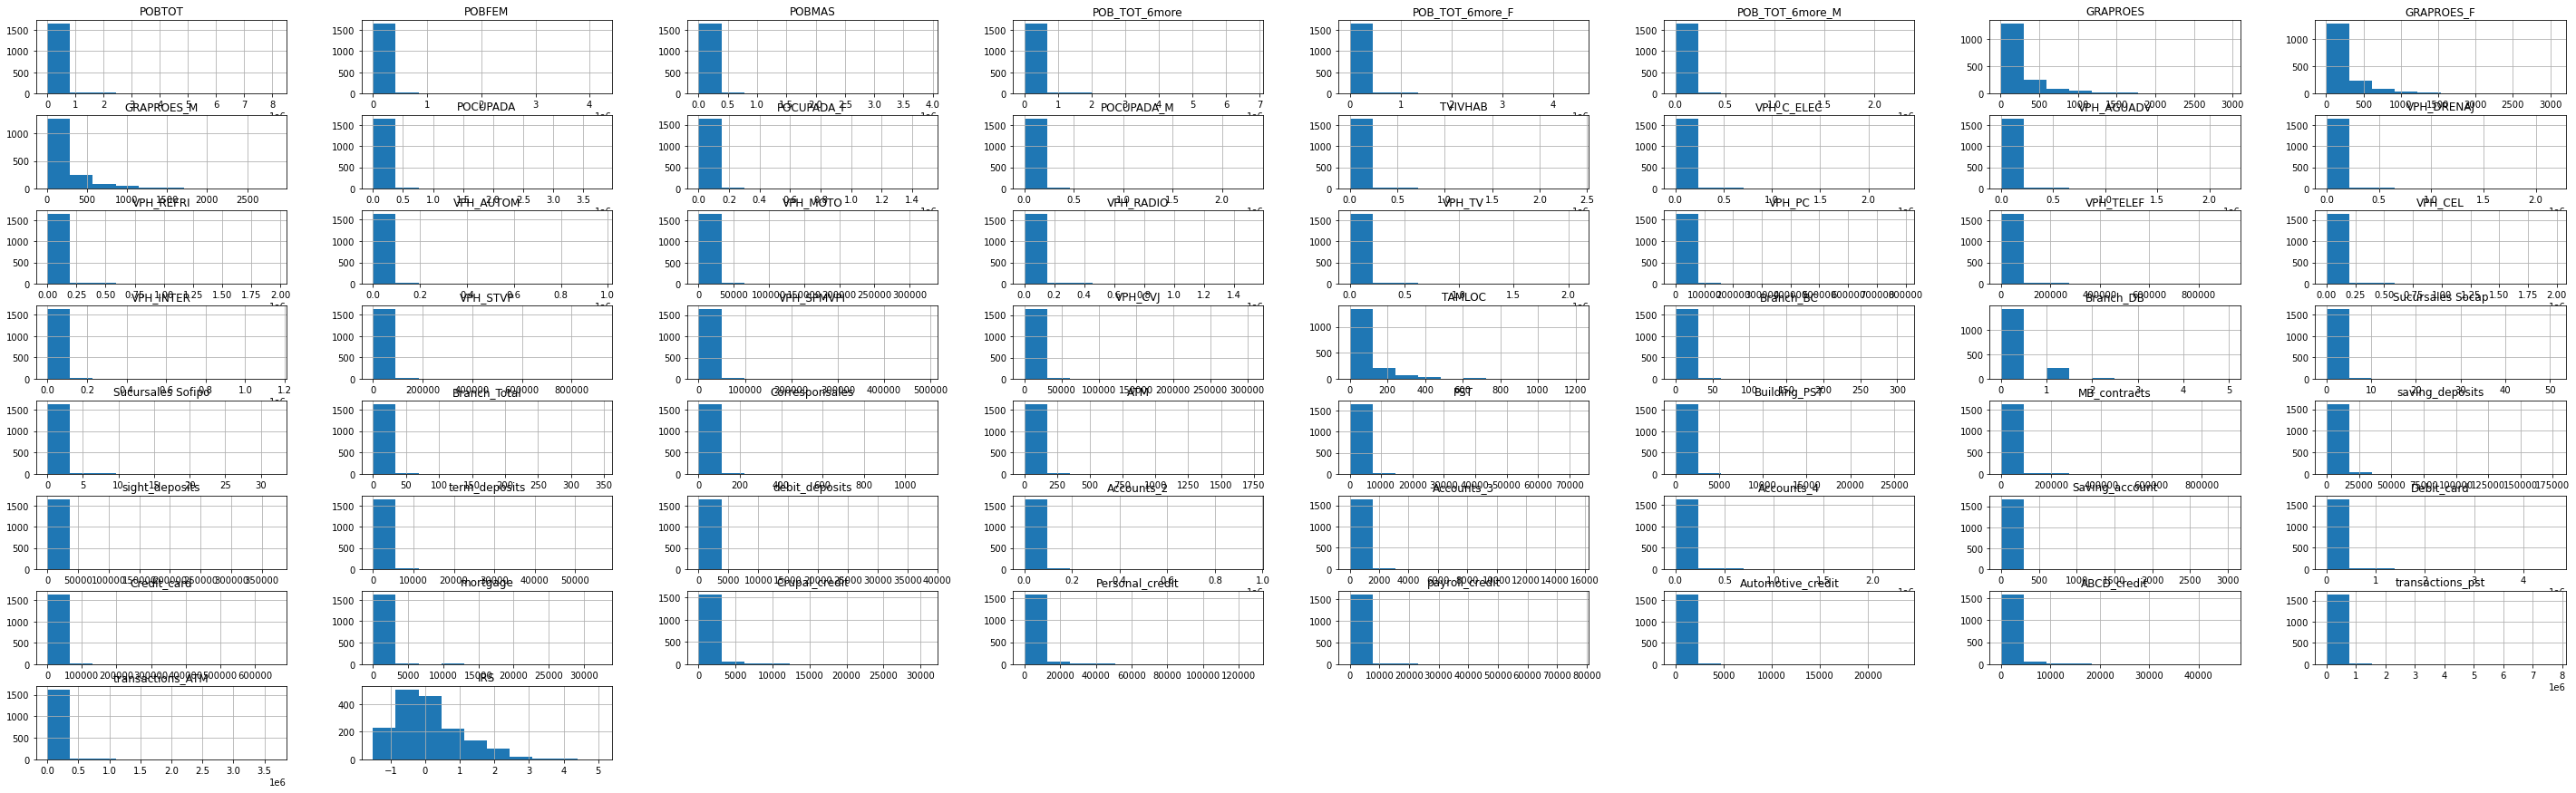

In [76]:
#perhaps Pay TV and radio has something nearly Gaussian distribution
merge4.hist(figsize=(50, 15))
plt.show()

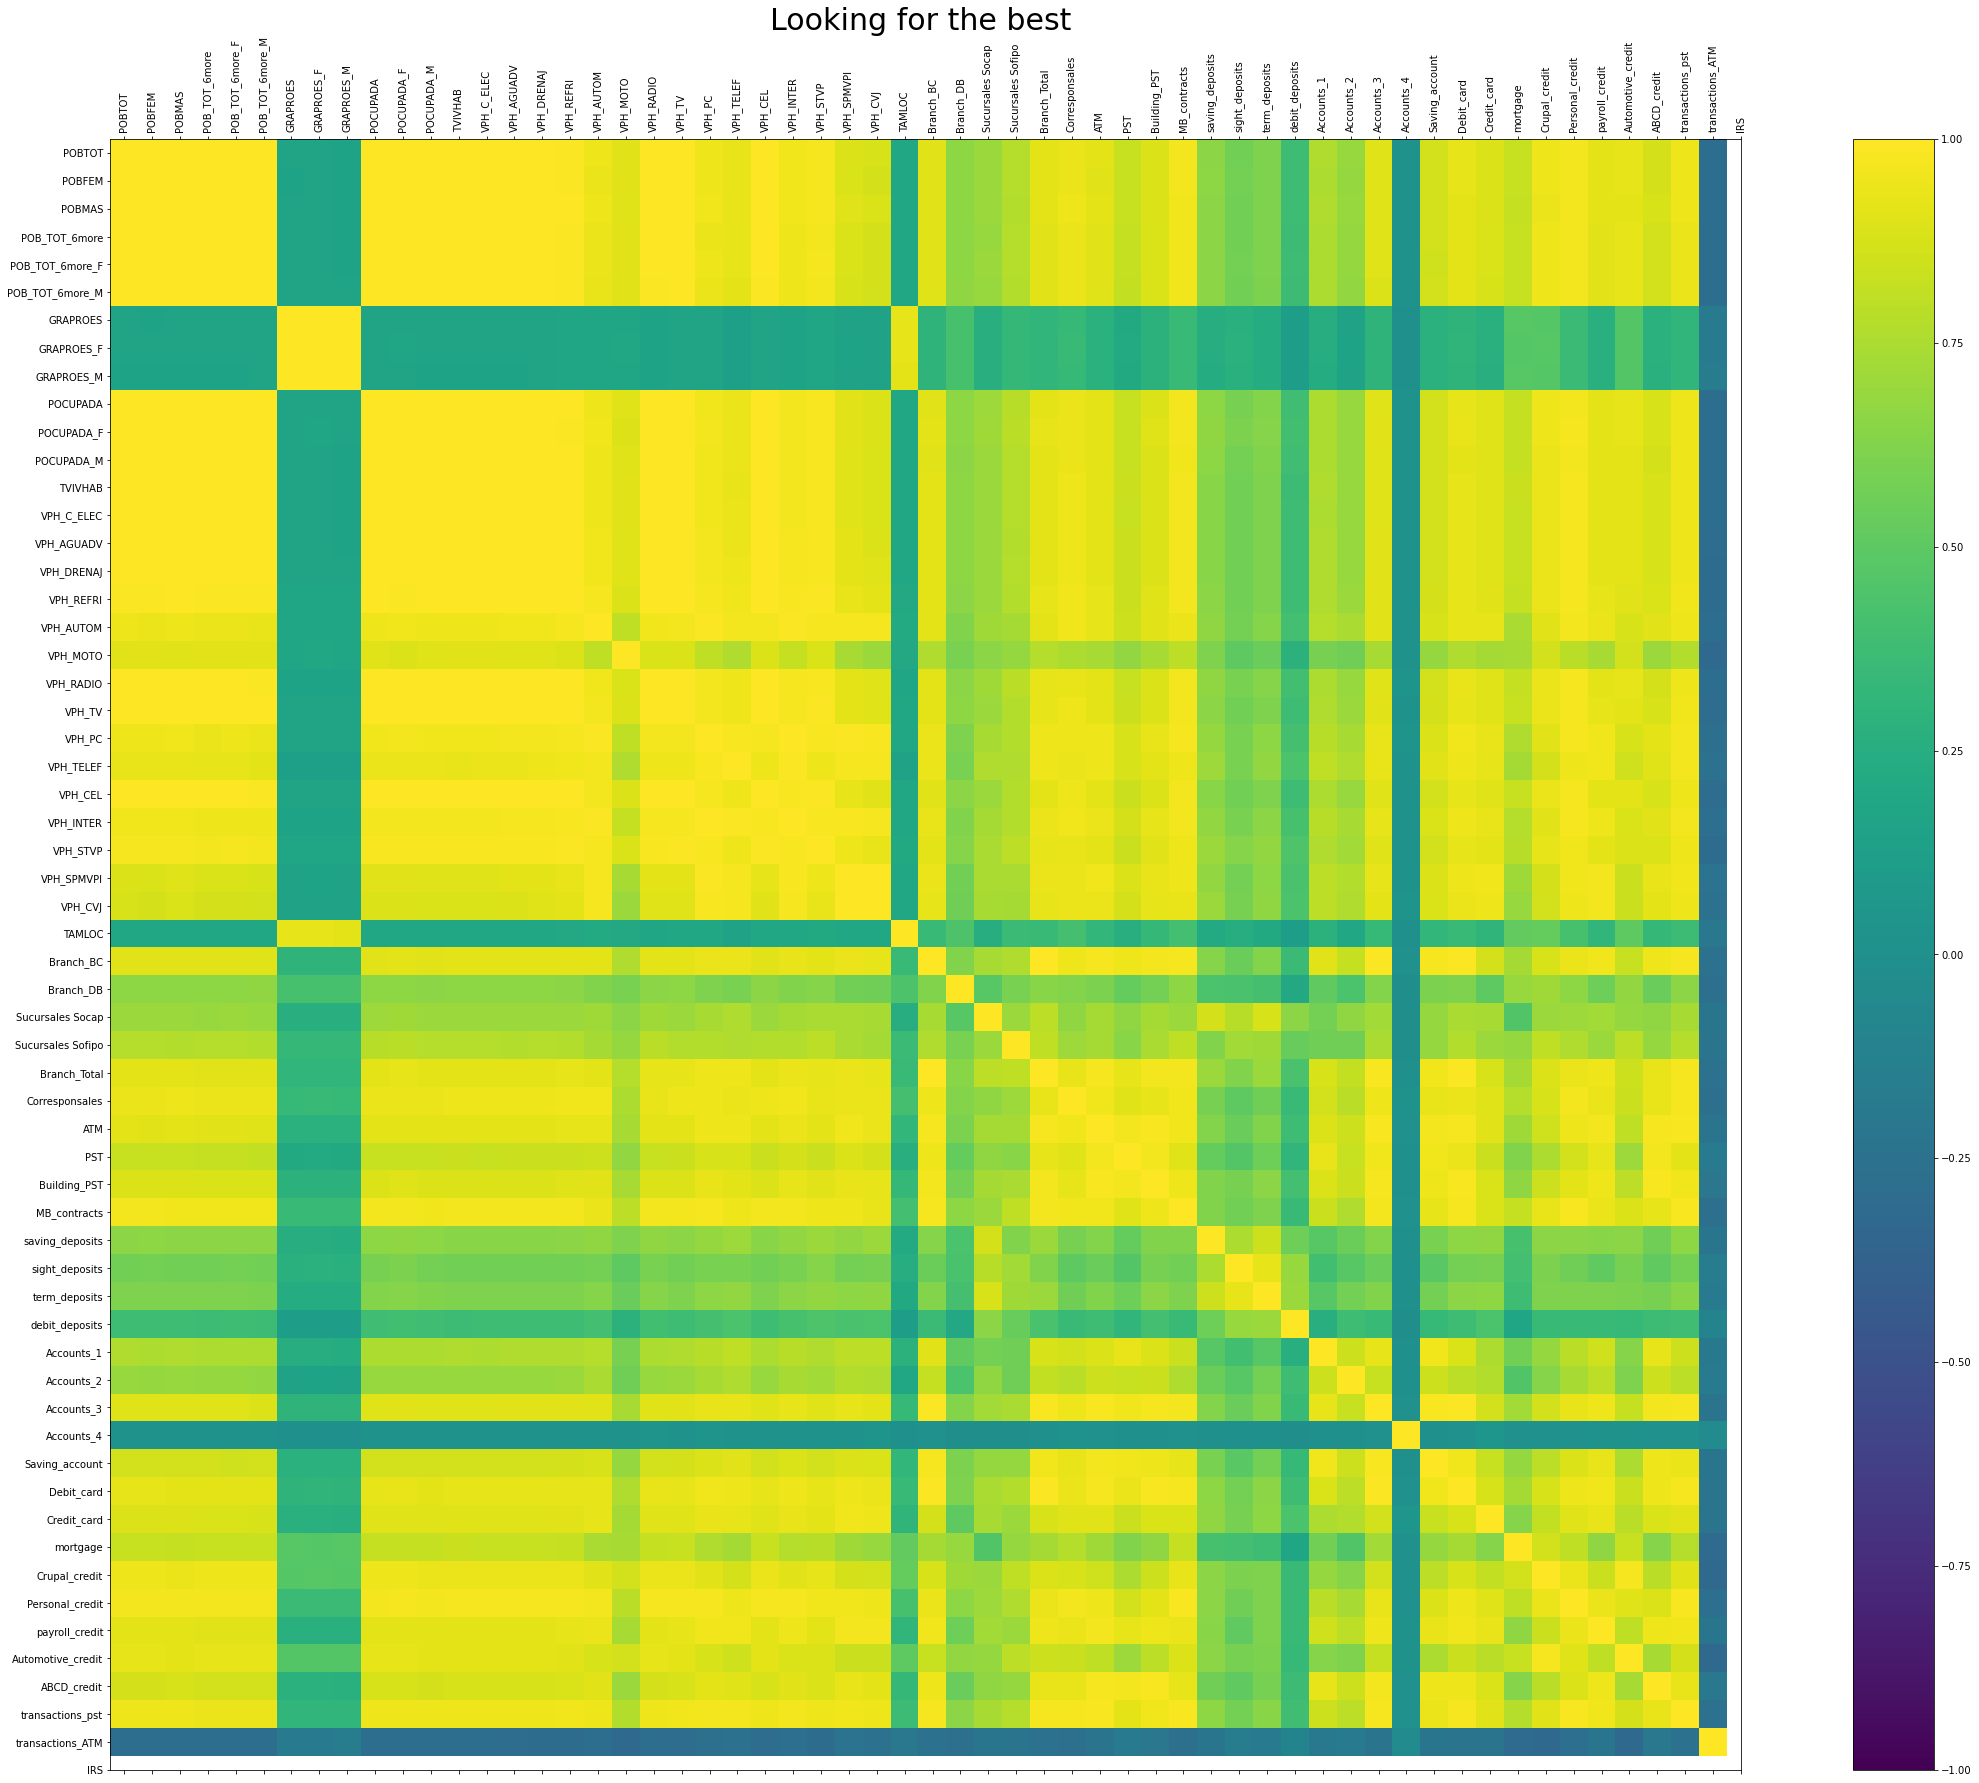

In [77]:
# Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If the change in opposite directions together (one goes up, one goes down), then they are negatively correlated.
# This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.
correlations = merge4.corr()
# plot correlation matrix
fig = plt.figure(figsize=(40, 30))
ax = fig.add_subplot(111)

names = ['POBTOT', 'POBFEM', 'POBMAS',
       'POB_TOT_6more', 'POB_TOT_6more_F', 'POB_TOT_6more_M', 'GRAPROES',
       'GRAPROES_F', 'GRAPROES_M', 'POCUPADA', 'POCUPADA_F', 'POCUPADA_M',
       'TVIVHAB', 'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ', 'VPH_REFRI',
       'VPH_AUTOM', 'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF',
       'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'TAMLOC',
       'Branch_BC', 'Branch_DB', 'Sucursales Socap', 'Sucursales Sofipo',
       'Branch_Total', 'Corresponsales', 'ATM', 'PST', 'Building_PST',
       'MB_contracts', 'saving_deposits', 'sight_deposits', 'term_deposits',
       'debit_deposits', 'Accounts_1', 'Accounts_2', 'Accounts_3',
       'Accounts_4', 'Saving_account', 'Debit_card', 'Credit_card', 'mortgage',
       'Crupal_credit', 'Personal_credit', 'payroll_credit',
       'Automotive_credit', 'ABCD_credit', 'transactions_pst',
       'transactions_ATM', 'IRS']

cax = ax.matshow(correlations, vmin=-1, vmax=1)
ticks = np.arange(0,59,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
fig.colorbar(cax)
ax.set_xticklabels(names, rotation="vertical")
ax.set_yticklabels(names)
ax.set_title("Looking for the best ", size=30)
plt.savefig('heatmap.png')
plt.show()


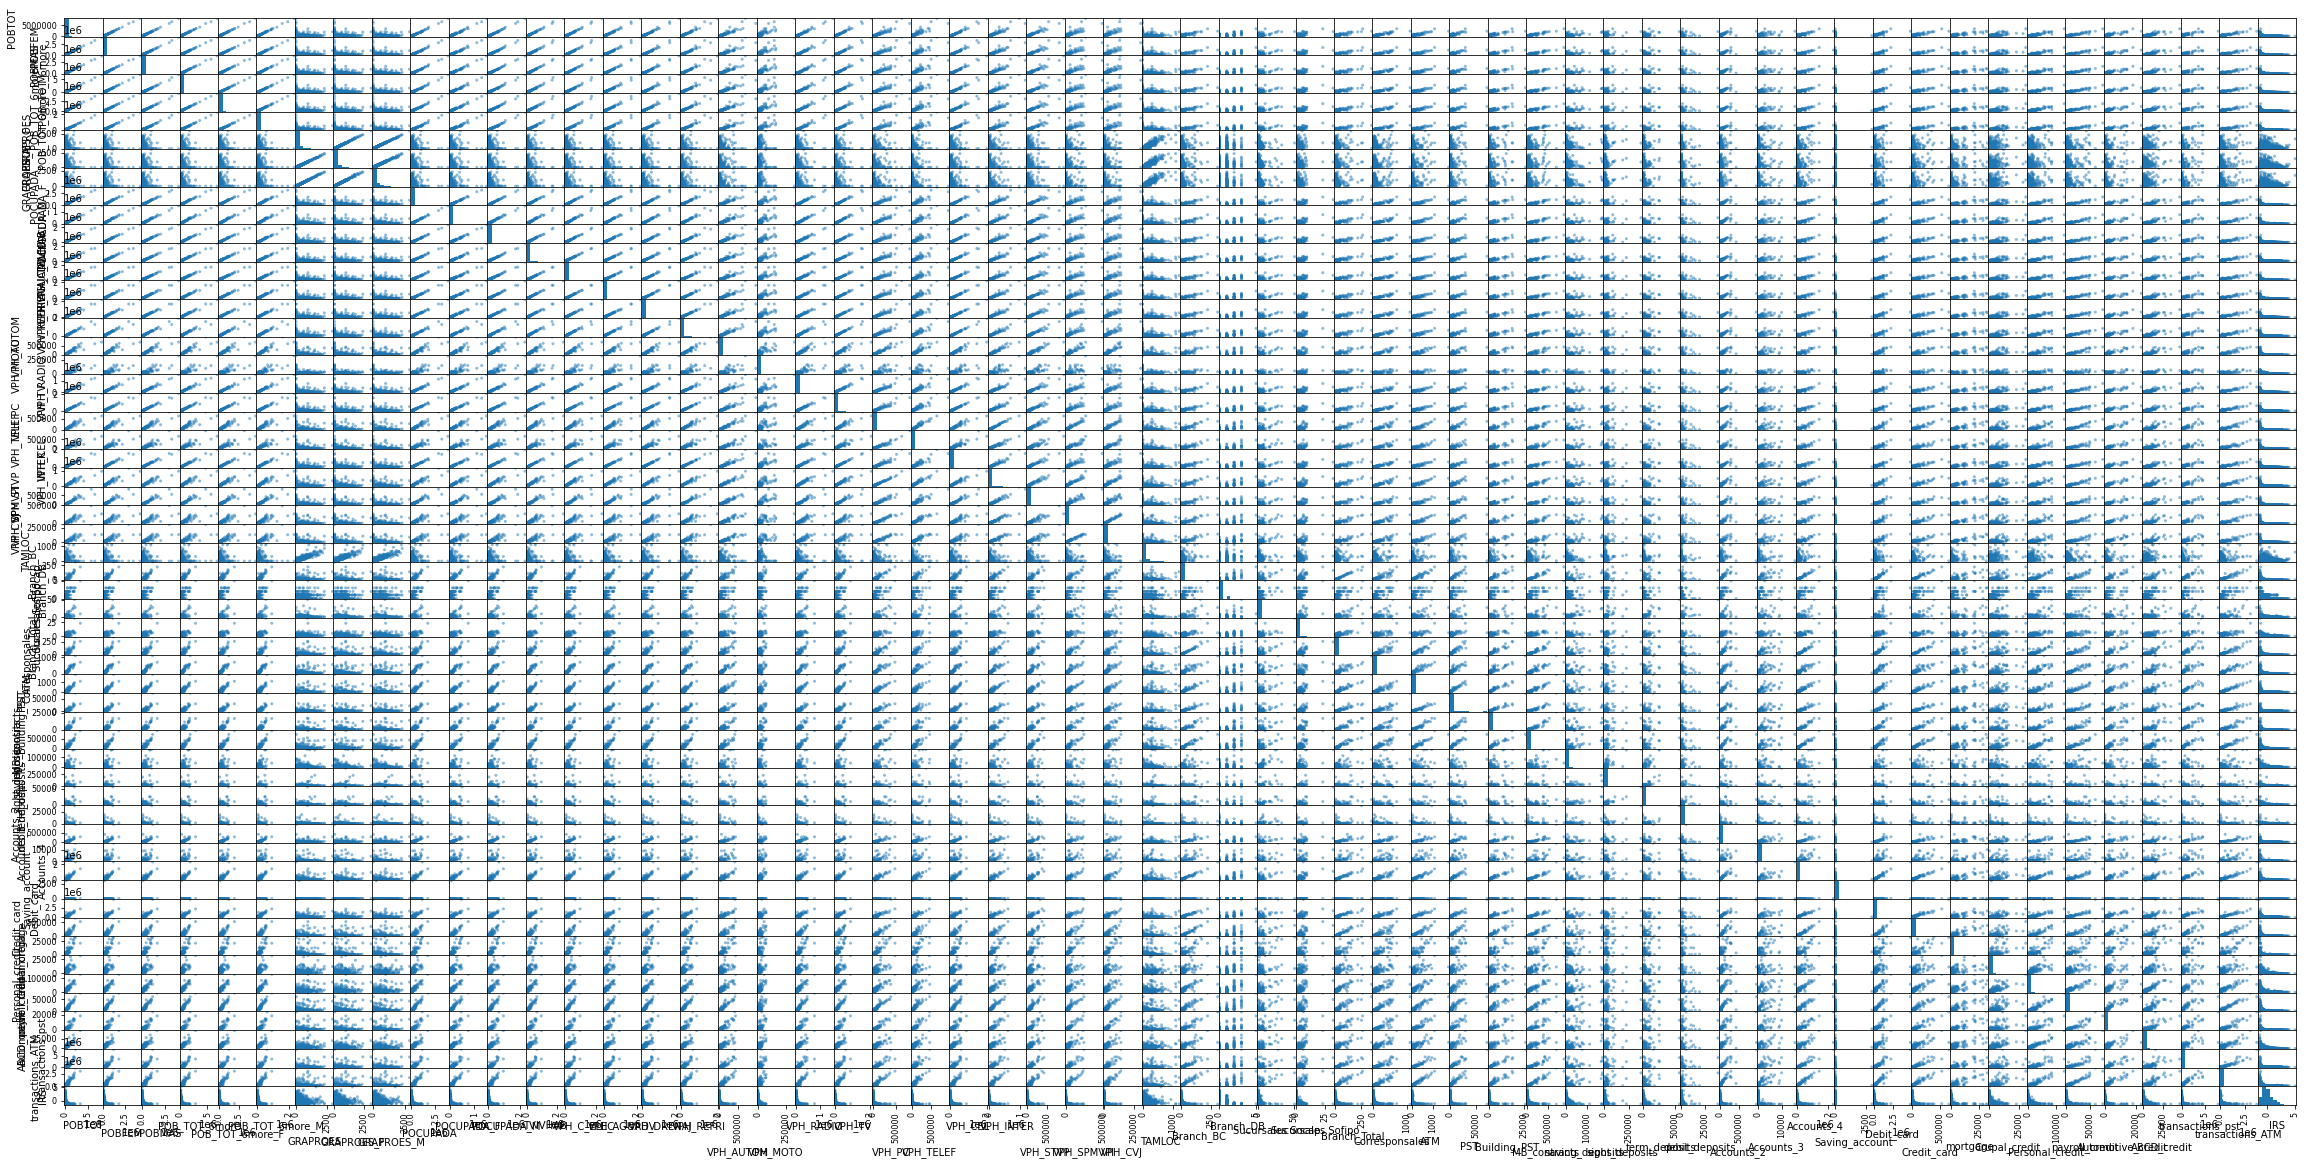

In [78]:
# Scatter plot matrix. Structured relationships between variables and summarize the relationship between two variables with a line
scatter_matrix(merge4, figsize=(40, 20), alpha=.5)
plt.show()

In [68]:
corr = merge4.corr()
corr

,MUN,POBTOT,POBFEM,POBMAS,POB_TOT_6more,POB_TOT_6more_F,POB_TOT_6more_M,GRAPROES,GRAPROES_F,GRAPROES_M,...,Credit_card,mortgage,Crupal_credit,Personal_credit,payroll_credit,Automotive_credit,ABCD_credit,transactions_pst,transactions_ATM,IRS
MUN,1.000000,-0.147826,-0.146634,-0.148778,-0.147439,-0.147028,-0.148198,-0.244948,-0.250216,-0.238705,...,-0.112848,-0.116334,-0.160225,-0.173968,-0.139080,-0.108885,-0.179160,-0.100745,-0.126541,0.396249
POBTOT,-0.147826,1.000000,0.999843,0.999831,0.999676,0.999767,0.999123,0.164498,0.165705,0.163323,...,0.922341,0.894610,0.830488,0.945725,0.967868,0.916034,0.923097,0.873247,0.947494,-0.277670
POBFEM,-0.146634,0.999843,1.000000,0.999350,0.999813,0.999894,0.999281,0.163560,0.164711,0.162440,...,0.924632,0.891338,0.834873,0.948404,0.968672,0.915178,0.926139,0.871175,0.948205,-0.276868
POBMAS,-0.148778,0.999831,0.999350,1.000000,0.999201,0.999304,0.998624,0.164506,0.165757,0.163287,...,0.919734,0.897902,0.825451,0.942455,0.966688,0.916717,0.919551,0.875034,0.946523,-0.278162
POB_TOT_6more,-0.147439,0.999676,0.999813,0.999201,1.000000,0.999937,0.999753,0.164649,0.165837,0.163492,...,0.918124,0.887570,0.833239,0.947984,0.965798,0.909799,0.926230,0.866270,0.943010,-0.276810
POB_TOT_6more_F,-0.147028,0.999767,0.999894,0.999304,0.999937,1.000000,0.999442,0.164279,0.165451,0.163140,...,0.918812,0.889739,0.833069,0.947719,0.966002,0.910407,0.926319,0.866870,0.943793,-0.276140
POB_TOT_6more_M,-0.148198,0.999123,0.999281,0.998624,0.999753,0.999442,1.000000,0.165324,0.166543,0.164131,...,0.916146,0.882562,0.833077,0.947949,0.964788,0.907990,0.925480,0.864506,0.940822,-0.278019
GRAPROES,-0.244948,0.164498,0.163560,0.164506,0.164649,0.164279,0.165324,1.000000,0.999288,0.999240,...,0.302244,0.265749,0.478860,0.475995,0.362031,0.270210,0.463227,0.274524,0.316203,-0.164547
GRAPROES_F,-0.250216,0.165705,0.164711,0.165757,0.165837,0.165451,0.166543,0.999288,1.000000,0.997107,...,0.304757,0.268120,0.475860,0.476753,0.363948,0.273239,0.463906,0.277953,0.318076,-0.174755
GRAPROES_M,-0.238705,0.163323,0.162440,0.163287,0.163492,0.163140,0.164131,0.999240,0.997107,1.000000,...,0.299756,0.263474,0.481664,0.474949,0.360079,0.267341,0.462108,0.271315,0.314304,-0.153046


In [69]:
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

MUN              MUN                1.000000
Branch_BC        Branch_BC          1.000000
VPH_SPMVPI       VPH_SPMVPI         1.000000
VPH_STVP         VPH_STVP           1.000000
VPH_INTER        VPH_INTER          1.000000
                                      ...   
Saving_account   Accounts_3         0.002066
                 debit_deposits     0.001517
debit_deposits   Saving_account     0.001517
Saving_account   saving_deposits    0.000474
saving_deposits  Saving_account     0.000474
Length: 3481, dtype: float64

In [70]:
correlations = pd.DataFrame(corr[corr < 1].unstack().transpose()\
    .sort_values( ascending=False)\
    .drop_duplicates().dropna())

In [72]:
correlations.head(50)

,,0
TVIVHAB,VPH_C_ELEC,0.999974
POB_TOT_6more,POB_TOT_6more_F,0.999937
POB_TOT_6more_F,POBFEM,0.999894
POBFEM,POBTOT,0.999843
POBTOT,POBMAS,0.999831
POBFEM,POB_TOT_6more,0.999813
POB_TOT_6more_F,POBTOT,0.999767
POB_TOT_6more,POB_TOT_6more_M,0.999753
POBTOT,POB_TOT_6more,0.999676
VPH_TV,VPH_DRENAJ,0.999643


# Recursive feature elimination

# Principal Component Analysis: Fighting to Overffiting

In [80]:
# PCA method is sensible to the scale, we need to normalize first
from sklearn.preprocessing import StandardScaler

features = ['POBTOT', 'POBFEM', 'POBMAS',
       'POB_TOT_6more', 'POB_TOT_6more_F', 'POB_TOT_6more_M', 'GRAPROES',
       'GRAPROES_F', 'GRAPROES_M', 'POCUPADA', 'POCUPADA_F', 'POCUPADA_M',
       'TVIVHAB', 'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_DRENAJ', 'VPH_REFRI',
       'VPH_AUTOM', 'VPH_MOTO', 'VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF',
       'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'TAMLOC',
       'Branch_BC', 'Branch_DB', 'Sucursales Socap', 'Sucursales Sofipo',
       'Branch_Total', 'Corresponsales', 'ATM', 'PST', 'Building_PST',
       'MB_contracts', 'saving_deposits', 'sight_deposits', 'term_deposits',
       'debit_deposits', 'Accounts_1', 'Accounts_2', 'Accounts_3',
       'Accounts_4', 'Saving_account', 'Debit_card', 'Credit_card', 'mortgage',
       'Crupal_credit', 'Personal_credit', 'payroll_credit',
       'Automotive_credit', 'ABCD_credit', 'transactions_pst',
       'transactions_ATM', 'IRS']

X = merge4.loc[:,features].values
y = merge4.loc[:,['VPH_SPMVPI']].values


In [81]:
print(X.shape,y.shape)

(1683, 59) (1683, 1)


In [82]:
# standarizing the features
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y)

X = pd.DataFrame(X, columns=features)
X

,POBTOT,POBFEM,POBMAS,POB_TOT_6more,POB_TOT_6more_F,POB_TOT_6more_M,GRAPROES,GRAPROES_F,GRAPROES_M,POCUPADA,...,Credit_card,mortgage,Crupal_credit,Personal_credit,payroll_credit,Automotive_credit,ABCD_credit,transactions_pst,transactions_ATM,IRS
0,1.982561,1.987585,1.976485,1.999146,2.007720,1.981536,2.368632,2.427762,2.318602,2.073831,...,7.653442,9.250311,2.229923,9.730015,9.413722,7.954197,9.800584,6.244917,8.095287,-1.507419
1,-0.227442,-0.229439,-0.229406,-0.230419,-0.229974,-0.231217,0.243252,0.288726,0.191808,-0.226295,...,-0.128508,-0.168451,-0.296874,-0.062239,-0.159792,-0.155094,-0.306958,-0.136352,-0.128464,-0.393949
2,-0.135204,-0.131808,-0.138344,-0.133387,-0.134223,-0.131676,0.070499,0.066653,0.078908,-0.144038,...,-0.171640,-0.171052,-0.288628,-0.166427,-0.202609,-0.164409,-0.231879,-0.147787,-0.204009,-0.499994
3,-0.067130,-0.065149,-0.068747,-0.060006,-0.062674,-0.054687,0.866675,0.869000,0.851224,-0.066277,...,-0.175824,-0.153714,-0.149409,0.037154,-0.171451,-0.155094,0.048224,-0.129199,-0.198977,-0.415158
4,-0.190633,-0.189636,-0.191145,-0.189377,-0.189883,-0.188303,-0.460465,-0.443447,-0.478379,-0.199596,...,-0.186499,-0.172353,-0.312882,-0.312698,-0.222108,-0.173724,-0.319231,-0.133543,-0.202605,-0.722688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,-0.189480,-0.189072,-0.189778,-0.188658,-0.189233,-0.187446,0.040643,0.063253,0.011175,-0.202078,...,-0.185604,-0.169318,-0.303666,-0.326366,-0.185523,-0.154318,-0.258229,-0.147101,-0.181970,-0.839337
1679,-0.160259,-0.161021,-0.160266,-0.159397,-0.161582,-0.154999,0.690047,0.725254,0.647767,-0.167801,...,-0.090137,-0.161949,-0.276016,-0.093172,-0.130645,-0.104639,-0.287105,-0.143982,-0.142893,-1.040822
1680,0.124545,0.129045,0.119446,0.123038,0.126879,0.115368,0.090668,0.114034,0.065541,0.119636,...,1.656208,0.871431,0.607806,0.978804,1.668070,1.939179,0.370560,1.014213,1.476970,-1.528628
1681,-0.187046,-0.186781,-0.187078,-0.186230,-0.186429,-0.185767,-0.511189,-0.494794,-0.527456,-0.193491,...,-0.183325,-0.161082,0.036378,-0.282605,-0.122805,-0.142674,-0.325728,-0.138787,-0.176627,-0.902964


In [93]:
X = X.dropna()

In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14)
PrincipalComponents = pca.fit_transform(X)
princialDF = pd.DataFrame(data=PrincipalComponents)
princialDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,37.770023,2.847064,0.248580,2.835472,-1.079760,-1.480259,2.013494,-1.695387,-3.533696,-2.979524,1.074646,4.253231,-0.992179,0.585240
1,-0.881342,-1.047251,-0.212948,0.423582,0.194491,0.053804,0.574841,0.278056,0.222730,-0.175412,0.096446,0.021688,-0.210227,-0.363822
2,-0.480133,-0.420691,0.247062,-0.408270,-0.104304,0.187285,0.543926,-1.195618,-0.321076,1.133638,0.517959,-0.128619,-0.261430,0.019388
3,-0.123745,-1.510496,0.817062,0.367606,0.293828,0.134405,0.508167,0.440873,-0.622410,-0.130054,-0.270880,-0.139045,0.018986,0.075358
4,-1.292885,0.714829,-0.035416,-0.398651,0.044551,0.091285,0.688900,0.233453,0.075249,-0.103093,0.123829,-0.086241,0.037776,-0.074638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,-1.128680,-0.189867,-0.107883,-0.130948,0.152583,0.107003,0.849119,0.325140,0.130953,-0.129022,0.129924,-0.052619,-0.049244,-0.008480
1662,-0.597805,-1.314197,-0.168453,0.200543,0.300115,0.142959,1.088072,0.438697,0.154401,-0.193531,0.126168,-0.076454,-0.084701,-0.012785
1663,7.290803,1.611183,-0.222326,1.077829,-0.136627,-0.069958,2.465327,-2.018969,-0.551349,-0.172300,-0.285805,2.698817,-0.440747,0.732035
1664,-1.210294,0.706858,-0.173293,-0.612586,-0.000187,0.103288,0.787033,0.212846,0.199116,-0.145734,0.024129,-0.078695,0.198082,0.067076


In [128]:
# summarize components
print("Explained Variance: %s" % pca.explained_variance_ratio_)
print(pca.components_)

Explained Variance: [0.6869572  0.08969404 0.05540964 0.02890921 0.02450805 0.02390676
 0.02068605 0.01476518 0.01123978 0.0081113  0.00568622 0.0052275
 0.00449823 0.00305637]
[[ 8.93555937e-02  8.91642018e-02  8.94359524e-02  8.73971809e-02
   8.84795680e-02  8.52159789e-02  7.70887202e-02  7.74661735e-02
   7.66695446e-02  9.38491939e-02  9.86271181e-02  9.04253031e-02
   9.11574656e-02  9.16045295e-02  9.37256900e-02  9.50244572e-02
   9.82583575e-02  1.08031615e-01  6.75530338e-02  9.65167298e-02
   9.51509141e-02  1.18311772e-01  1.12175721e-01  9.66697392e-02
   1.13548046e-01  1.02180968e-01  1.23577677e-01  1.21027435e-01
   8.51612700e-02  1.81887356e-01  1.26010259e-01  1.46881546e-01
   1.52063788e-01  1.83664869e-01  1.80363557e-01  1.81581828e-01
   1.69834122e-01  1.79649658e-01  1.83778382e-01  1.32839187e-01
   1.20722502e-01  1.31520512e-01  8.27543593e-02  4.10646806e-02
   1.58573433e-01  1.49111564e-01  1.81214538e-01  3.07021839e-03
   1.75313722e-01  1.82699154e-

In [129]:
# Let's create a DF with the principal component value for all 2469 municipalities
principal_determinant = pd.DataFrame(data =PrincipalComponents, columns=["principal component 1", 'principal component 2', "principal component 3", "principal component 4", "principal component 5", "principal component 6", "principal component 7", "principal component 8", "principal component 9", "principal component 10", "principal component 11", "principal component 12", "principal component 13", "principal component 14"])
principal_determinant

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14
0,37.770023,2.847064,0.248580,2.835472,-1.079760,-1.480259,2.013494,-1.695387,-3.533696,-2.979524,1.074646,4.253231,-0.992179,0.585240
1,-0.881342,-1.047251,-0.212948,0.423582,0.194491,0.053804,0.574841,0.278056,0.222730,-0.175412,0.096446,0.021688,-0.210227,-0.363822
2,-0.480133,-0.420691,0.247062,-0.408270,-0.104304,0.187285,0.543926,-1.195618,-0.321076,1.133638,0.517959,-0.128619,-0.261430,0.019388
3,-0.123745,-1.510496,0.817062,0.367606,0.293828,0.134405,0.508167,0.440873,-0.622410,-0.130054,-0.270880,-0.139045,0.018986,0.075358
4,-1.292885,0.714829,-0.035416,-0.398651,0.044551,0.091285,0.688900,0.233453,0.075249,-0.103093,0.123829,-0.086241,0.037776,-0.074638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,-1.128680,-0.189867,-0.107883,-0.130948,0.152583,0.107003,0.849119,0.325140,0.130953,-0.129022,0.129924,-0.052619,-0.049244,-0.008480
1662,-0.597805,-1.314197,-0.168453,0.200543,0.300115,0.142959,1.088072,0.438697,0.154401,-0.193531,0.126168,-0.076454,-0.084701,-0.012785
1663,7.290803,1.611183,-0.222326,1.077829,-0.136627,-0.069958,2.465327,-2.018969,-0.551349,-0.172300,-0.285805,2.698817,-0.440747,0.732035
1664,-1.210294,0.706858,-0.173293,-0.612586,-0.000187,0.103288,0.787033,0.212846,0.199116,-0.145734,0.024129,-0.078695,0.198082,0.067076


In [130]:
print(f'Explained variation per principal component: {pca.explained_variance_ratio_}')
np.sum(pca.explained_variance_ratio_)

Explained variation per principal component: [0.6869572  0.08969404 0.05540964 0.02890921 0.02450805 0.02390676
 0.02068605 0.01476518 0.01123978 0.0081113  0.00568622 0.0052275
 0.00449823 0.00305637]


0.9826555297041941

# FEATURE IMPORTANCE

In [131]:
#number of components
n_pcs = pca.components_.shape[0]

# get the index the most important fearures on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

most_important_names = [features[most_important[i]] for i in range(n_pcs)]


# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

df

,0,1
0,PC0,transactions_ATM
1,PC1,GRAPROES_M
2,PC2,debit_deposits
3,PC3,IRS
4,PC4,Saving_account
5,PC5,Accounts_1
6,PC6,IRS
7,PC7,Branch_DB
8,PC8,debit_deposits
9,PC9,Branch_DB


In [132]:
# Exploring the data set
principal_determinant.describe()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14
count,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03
mean,-1.024924e-16,-4.238306e-16,8.719016e-17,3.481942e-17,-1.431095e-17,-3.230376e-17,1.519393e-16,-1.819273e-17,-8.511599e-17,-9.429565e-17,-2.054179e-17,-2.538152e-17,1.115804e-17,2.652404e-16
std,5.332629e+00,1.926896e+00,1.514500e+00,1.093943e+00,1.007235e+00,9.948026e-01,9.253699e-01,7.818004e-01,6.821116e-01,5.794578e-01,4.851638e-01,4.651827e-01,4.315162e-01,3.556965e-01
min,-1.702356e+00,-1.229914e+01,-1.581796e+01,-1.146389e+01,-5.192532e+00,-2.709969e+01,-8.891484e+00,-5.832194e+00,-9.536200e+00,-5.149331e+00,-5.475162e+00,-5.803517e+00,-3.253682e+00,-4.228447e+00
25%,-1.482653e+00,-4.203922e-01,-1.434777e-01,-4.233757e-01,-1.208135e-01,-8.910102e-02,-4.358121e-01,-4.047935e-02,-7.800862e-02,-1.280275e-01,-6.653358e-02,-6.382169e-02,-4.220783e-02,-5.535756e-02
50%,-1.255579e+00,6.037302e-01,-1.197424e-01,-6.302023e-02,-3.168445e-02,1.734926e-02,1.576017e-01,1.098857e-01,3.416970e-02,-7.595288e-02,2.417820e-02,-1.770896e-02,-3.608371e-03,-1.211836e-02
75%,-5.333487e-01,1.047626e+00,-1.560879e-02,4.231193e-01,5.738288e-02,9.977012e-02,6.017697e-01,2.362930e-01,1.156320e-01,-7.847358e-03,1.053230e-01,2.567338e-02,4.850598e-02,5.401926e-02
max,8.305433e+01,2.474397e+01,4.064380e+01,2.198790e+01,2.912117e+01,2.857384e+01,1.144728e+01,1.008087e+01,9.774339e+00,5.647595e+00,7.544551e+00,9.062137e+00,6.565506e+00,6.631438e+00


# ML Multiple Linear Regression
## Credit cards
With all variables

In [134]:
X = merge4.loc[:,features].values
y = merge4.loc[:,['VPH_SPMVPI']].values